# Business Case

### Predict if a patient has any cardiovascular disease or not.

Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Four out of 5CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age. Heart failure is a common event caused by CVDs and this dataset contains 11 features that can be used to predict a possible heart disease.

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.


## Domain Analysis

In [1]:
# import important libraries 
import pandas as pd  # used for load the data, manipulation of data,data cleaning & analysis
import numpy as np  # used for numerical function
import seaborn as sns  # use for data visualization
import matplotlib.pyplot as plt  # use for data visualization
import warnings  # use for ignore the warnings
warnings.filterwarnings('ignore')

In [2]:
data1 = pd.read_csv('values.csv')
data1

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,5qfar3,2,reversible_defect,125,4,2,1,0,254,0.2,1,67,163,0
176,2s2b1f,2,normal,180,4,0,0,1,327,3.4,0,55,117,1
177,nsd00i,2,reversible_defect,125,3,0,0,0,309,1.8,1,64,131,1
178,0xw93k,1,normal,124,3,2,1,0,255,0.0,1,48,175,0


In [3]:
data2 = pd.read_csv('labels.csv')
data2

,patient_id,heart_disease_present
0,0z64un,0
1,ryoo3j,0
2,yt1s1x,1
3,l2xjde,1
4,oyt4ek,0
...,...,...
175,5qfar3,1
176,2s2b1f,1
177,nsd00i,1
178,0xw93k,0


In [4]:
label = data2['heart_disease_present']
label

0      0
1      0
2      1
3      1
4      0
      ..
175    1
176    1
177    1
178    0
179    0
Name: heart_disease_present, Length: 180, dtype: int64

In [5]:
data = pd.concat([data1,label],axis=1)
data

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,5qfar3,2,reversible_defect,125,4,2,1,0,254,0.2,1,67,163,0,1
176,2s2b1f,2,normal,180,4,0,0,1,327,3.4,0,55,117,1,1
177,nsd00i,2,reversible_defect,125,3,0,0,0,309,1.8,1,64,131,1,1
178,0xw93k,1,normal,124,3,2,1,0,255,0.0,1,48,175,0,0


In [6]:
data.columns

Index(['patient_id', 'slope_of_peak_exercise_st_segment', 'thal',
       'resting_blood_pressure', 'chest_pain_type', 'num_major_vessels',
       'fasting_blood_sugar_gt_120_mg_per_dl', 'resting_ekg_results',
       'serum_cholesterol_mg_per_dl', 'oldpeak_eq_st_depression', 'sex', 'age',
       'max_heart_rate_achieved', 'exercise_induced_angina',
       'heart_disease_present'],
      dtype='object')

## Feature Information

**patient ID**: A unique identifier for each patient.\
**slope_of_peak_exercise_st_segment**: The slope of the peak exercise ST segment, an electrocardiography read out indicating quality of blood flow to the heart. \
**thal** : Results of thallium stress test measuring blood flow to the heart, with possible values normal, fixed_defect, reversible_defect. \
**resting_blood_pressure** : Resting blood pressure. \
**chest_pain_type** : Type of chest pain (4 values). \
**num_major_vessels** : Number of major vessels (0-3) colored by flourosopy.\
**fasting_blood_sugar_gt_120_mg_per_dl** : Fasting blood sugar > 120 mg/dl.\
**resting_ekg_results** : Resting electrocardiographic results.\
**serum_cholesterol_mg_per_dl** : Serum cholestoral in mg/dl.\
**oldpeak_eq_st_depression** : The depression of the ST segment, indicating potential ischemia. \
**sex** : Gender of the patient (0: female, 1: male).\
**age** : The age of the patient in years.\
**max_heart_rate_achieved** : Maximum heart rate achieved (beats per minute).\
**exercise_induced_angina** : Exercise-induced chest pain (0: False, 1: True).\
**heart_disease_present** : A binary feature indicating the presence (1) or absence (0) of heart disease.

## Basic Checks

In [7]:
data.head()  # shows the first 5 rows

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0


In [8]:
data.tail()  # shows the last 5 rows

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
175,5qfar3,2,reversible_defect,125,4,2,1,0,254,0.2,1,67,163,0,1
176,2s2b1f,2,normal,180,4,0,0,1,327,3.4,0,55,117,1,1
177,nsd00i,2,reversible_defect,125,3,0,0,0,309,1.8,1,64,131,1,1
178,0xw93k,1,normal,124,3,2,1,0,255,0.0,1,48,175,0,0
179,2nx10r,1,normal,160,3,1,0,0,201,0.0,0,54,163,0,0


In [9]:
data.info()  # gives information about data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 15 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   patient_id                            180 non-null    object 
 1   slope_of_peak_exercise_st_segment     180 non-null    int64  
 2   thal                                  180 non-null    object 
 3   resting_blood_pressure                180 non-null    int64  
 4   chest_pain_type                       180 non-null    int64  
 5   num_major_vessels                     180 non-null    int64  
 6   fasting_blood_sugar_gt_120_mg_per_dl  180 non-null    int64  
 7   resting_ekg_results                   180 non-null    int64  
 8   serum_cholesterol_mg_per_dl           180 non-null    int64  
 9   oldpeak_eq_st_depression              180 non-null    float64
 10  sex                                   180 non-null    int64  
 11  age                

**Insights**
* Here we can not see any null values in any columns.
* Here we can see the total 180 rows and 15 columns in the dataset.
* Here we can see the total float datatype column is 1, total int datatype column is 12. and total object datatype column is 2.
* Here we can see the total storage of data is 21.2 kb.
* Here we can see the total object datatype column is 2.
     * Here we should change the object column in numerical column by using encoding.

In [10]:
data.describe()  # describe the statistical information for continuous column

,slope_of_peak_exercise_st_segment,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,1.550000,131.311111,3.155556,0.694444,0.161111,1.050000,249.211111,1.010000,0.688889,54.811111,149.483333,0.316667,0.444444
std,0.618838,17.010443,0.938454,0.969347,0.368659,0.998742,52.717969,1.121357,0.464239,9.334737,22.063513,0.466474,0.498290
min,1.000000,94.000000,1.000000,0.000000,0.000000,0.000000,126.000000,0.000000,0.000000,29.000000,96.000000,0.000000,0.000000
25%,1.000000,120.000000,3.000000,0.000000,0.000000,0.000000,213.750000,0.000000,0.000000,48.000000,132.000000,0.000000,0.000000
50%,1.000000,130.000000,3.000000,0.000000,0.000000,2.000000,245.500000,0.800000,1.000000,55.000000,152.000000,0.000000,0.000000
75%,2.000000,140.000000,4.000000,1.000000,0.000000,2.000000,281.250000,1.600000,1.000000,62.000000,166.250000,1.000000,1.000000
max,3.000000,180.000000,4.000000,3.000000,1.000000,2.000000,564.000000,6.200000,1.000000,77.000000,202.000000,1.000000,1.000000


**Insights**
* Here we can see there is no null values in any columns.
* Here we can see the max resting_blood_pressure is 180.0 and min resting_blood_pressure is 94.0 and the min to max oldpeak_eq_st_depression is 0 to 6.2.
* Here we can see the min age is 29 and max age is 77.
* Here we can see the chest_pain_type in 1 to 4 and slope_of_peak_exercise_st_segment min to max is 1 to 3.

In [11]:
data.describe(include='O')  # describe the categorical columns

,patient_id,thal
count,180,180
unique,180,3
top,0z64un,normal
freq,1,98


**Insights**
* The patient_id column have all unique values, so we can drop it.
* the thal column have 3 unique value, most occurance value is normal.

In [12]:
data.drop('patient_id',axis=1,inplace=True)

## EDA : Exploratory Data Analysis

EDA is the process of analyzing and visualizing datasets.
* there are three type of EDA:
  1. Univariante Analysis
  2. Biavariante Analysis
  3. Multivariante Analysis

### 1. Univariante Analysis

In [286]:
num_col = data.select_dtypes(include=['int64','float64'])
num_col.columns

Index(['slope_of_peak_exercise_st_segment', 'resting_blood_pressure',
       'chest_pain_type', 'num_major_vessels',
       'fasting_blood_sugar_gt_120_mg_per_dl', 'resting_ekg_results',
       'serum_cholesterol_mg_per_dl', 'oldpeak_eq_st_depression', 'sex', 'age',
       'max_heart_rate_achieved', 'exercise_induced_angina',
       'heart_disease_present'],
      dtype='object')

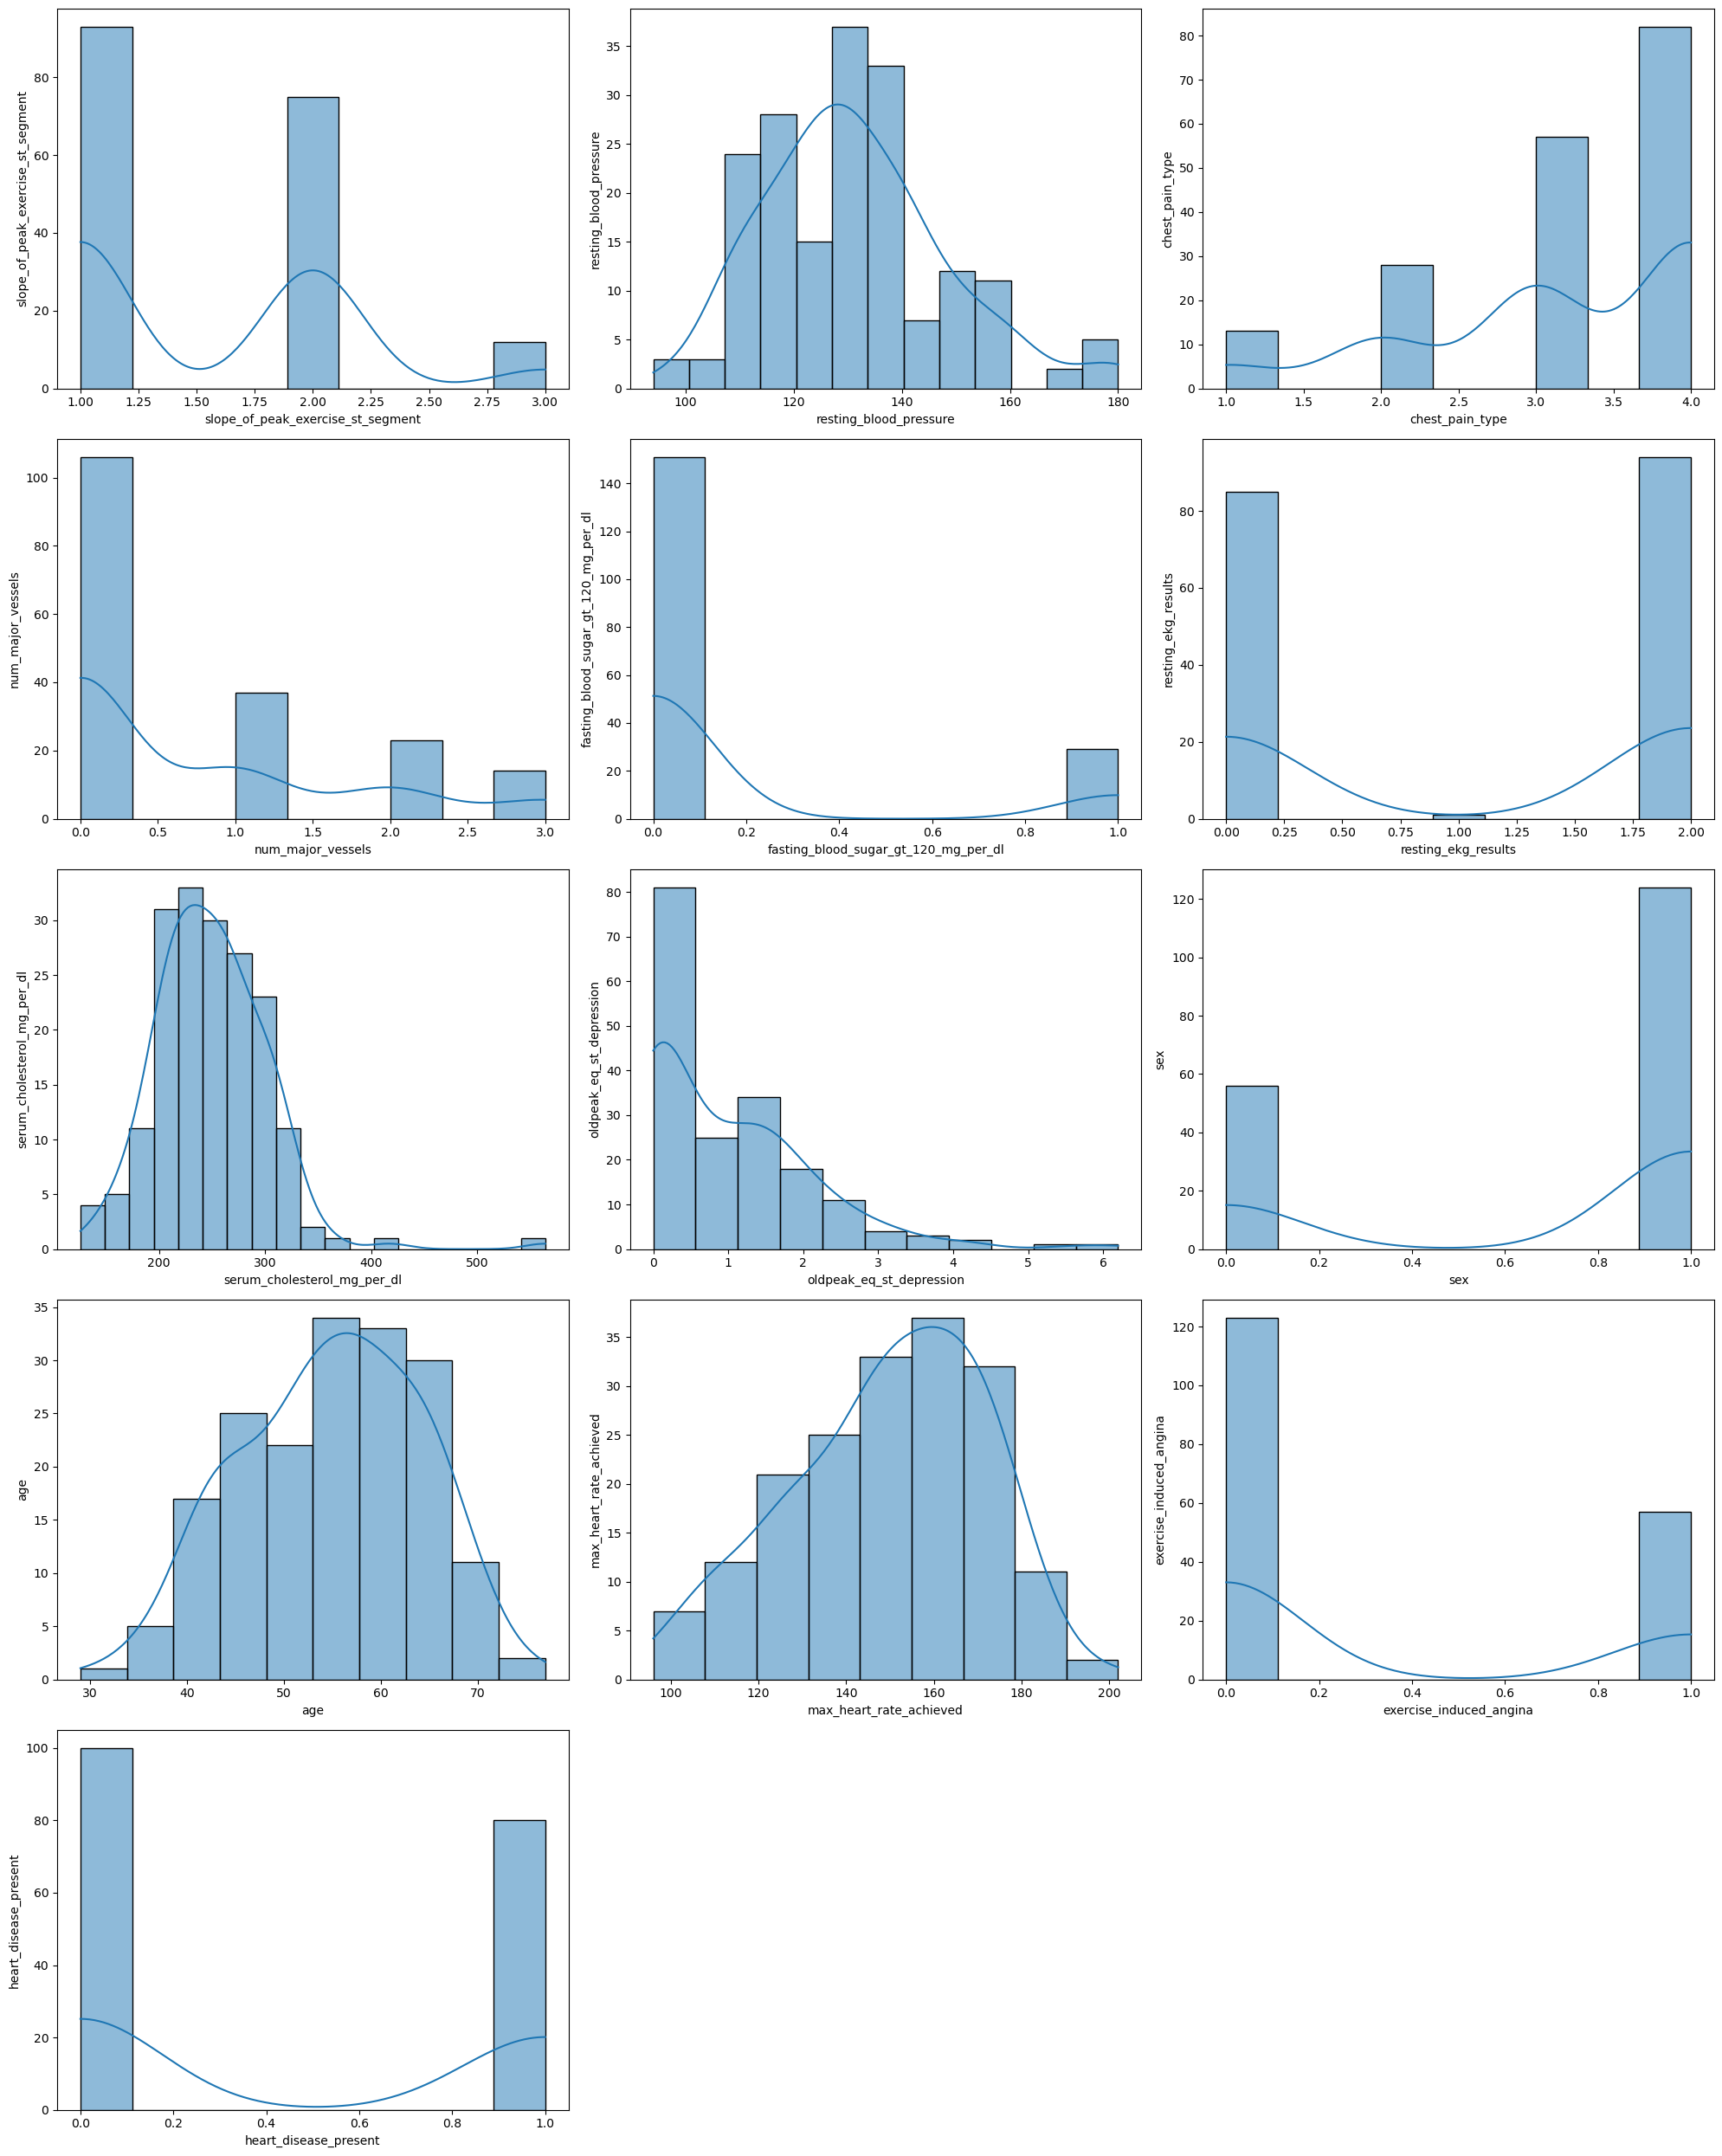

In [287]:
plt.figure(figsize=(20,25))
plt_num = 1
for i in num_col:
    plt.subplot(5,3,plt_num)
    sns.histplot(data[i],kde=True)
    plt.xlabel(i,fontsize=10)
    plt.ylabel(i,fontsize=10)
    plt_num +=1
plt.tight_layout()

**Insights**
* Here we can use histogram plot for numerical columns.
* Here we can see the resting_blood_pressure, serum_cholesterol_mg_per_dl, age and max_heart_rate_achieved columns follow normal distribution.

### 2. Biavariante Analysis

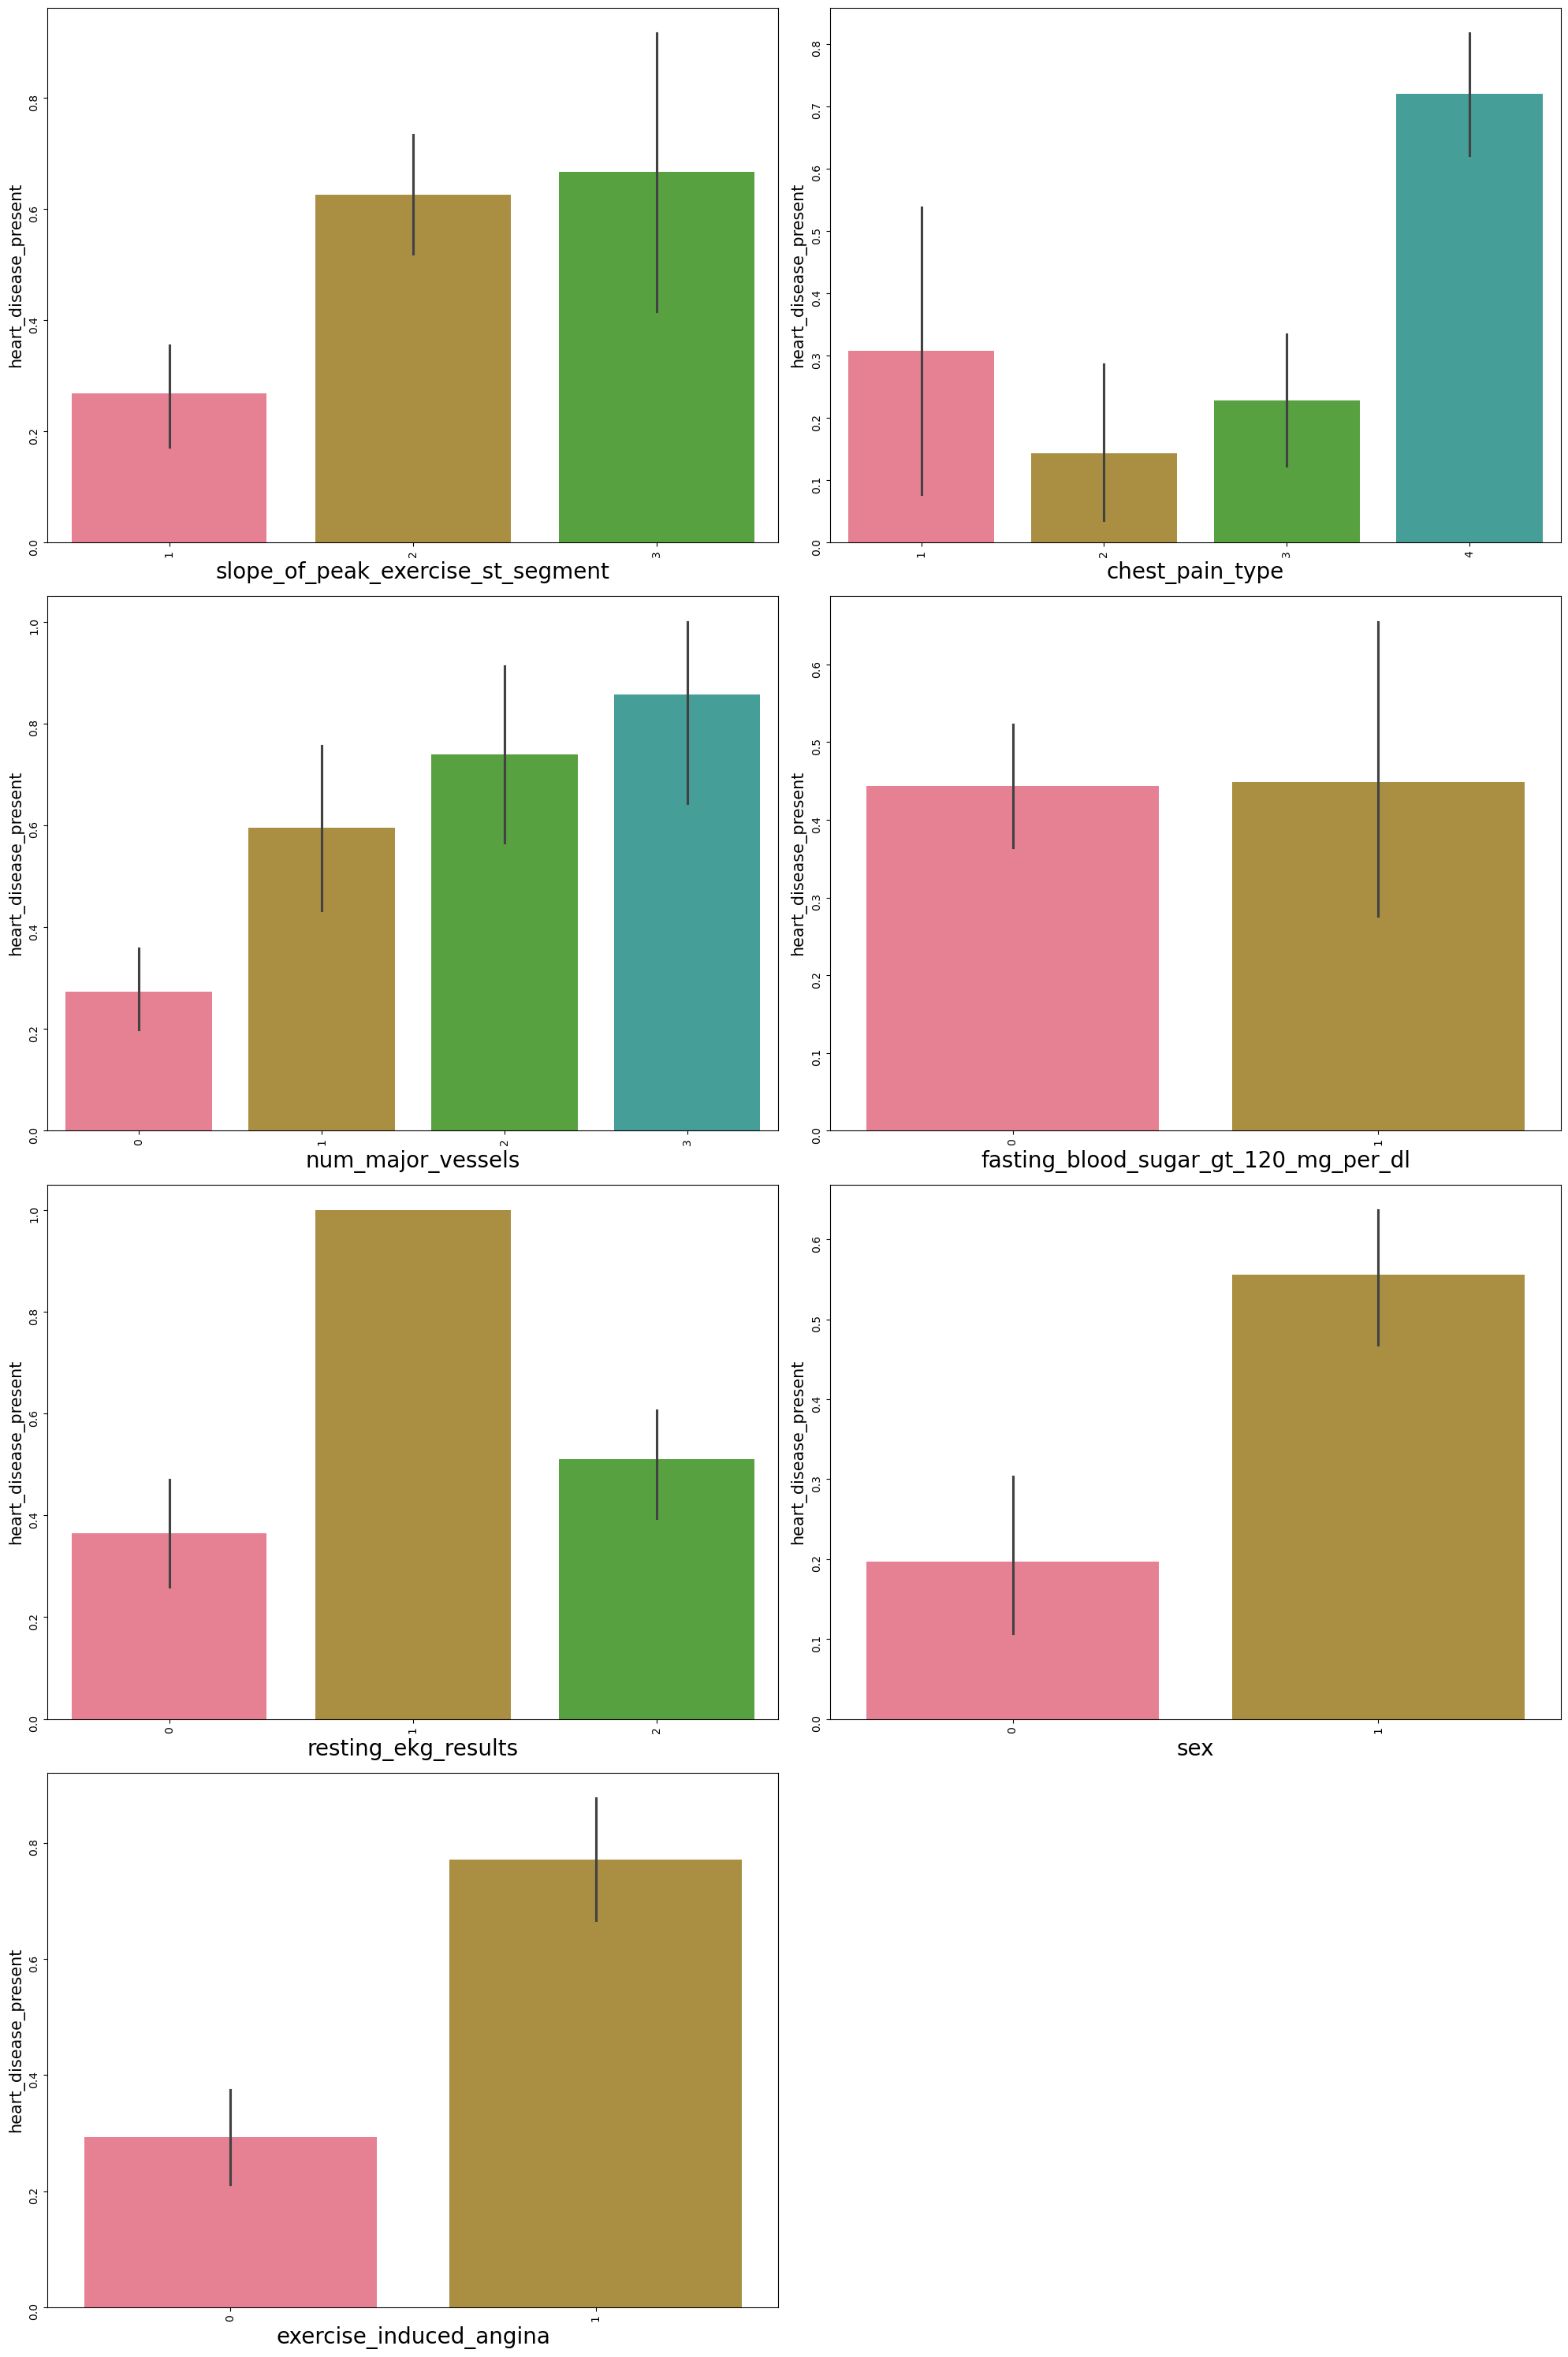

In [288]:
palette = sns.color_palette('husl') 
plt.figure(figsize=(20,30),facecolor='white')  # define the plot size
plt_num=1
for i in data[['slope_of_peak_exercise_st_segment', 
       'chest_pain_type', 'num_major_vessels',
       'fasting_blood_sugar_gt_120_mg_per_dl', 'resting_ekg_results','sex','exercise_induced_angina',]]: # for loop
    if plt_num <= 7 :  # if condition
        plt.subplot(4,2,plt_num)  # assign the row and column
        sns.barplot(x=data[i],y=data.heart_disease_present,palette=palette)  # create a barplot
        plt.xticks(rotation=90)   # rotate xticks
        plt.yticks(rotation=90)   # ritate yticks
        plt.xlabel(i,fontsize=20)  # assign the xlabel value
        plt.ylabel('heart_disease_present',fontsize=15)  # assign the ylabel value
        plt_num += 1  # increment
plt.tight_layout()  # use for data show function

**Insights**
* Here we use barplot for biavariante analysis between two variables.
* The chart shows that a higher percentage of males have heart disease than females.
* there is a higher proportion of people with heart disease present who experience exercise-induced angina. This suggests that exercise-induced angina may be a potential indicator of heart disease.
* The highest percentage of heart disease cases are seen in patients with chest pain type 4. The lowest percentage of heart disease cases are seen in patients with chest pain type 2. This suggests that chest pain type is a significant factor in predicting the presence of heart disease.
* The individuals with resting EKG results of 1 have the highest probability of having heart disease, followed by those with results of 2, and lastly those with results of 0.

### 3. Multivariante Analysis

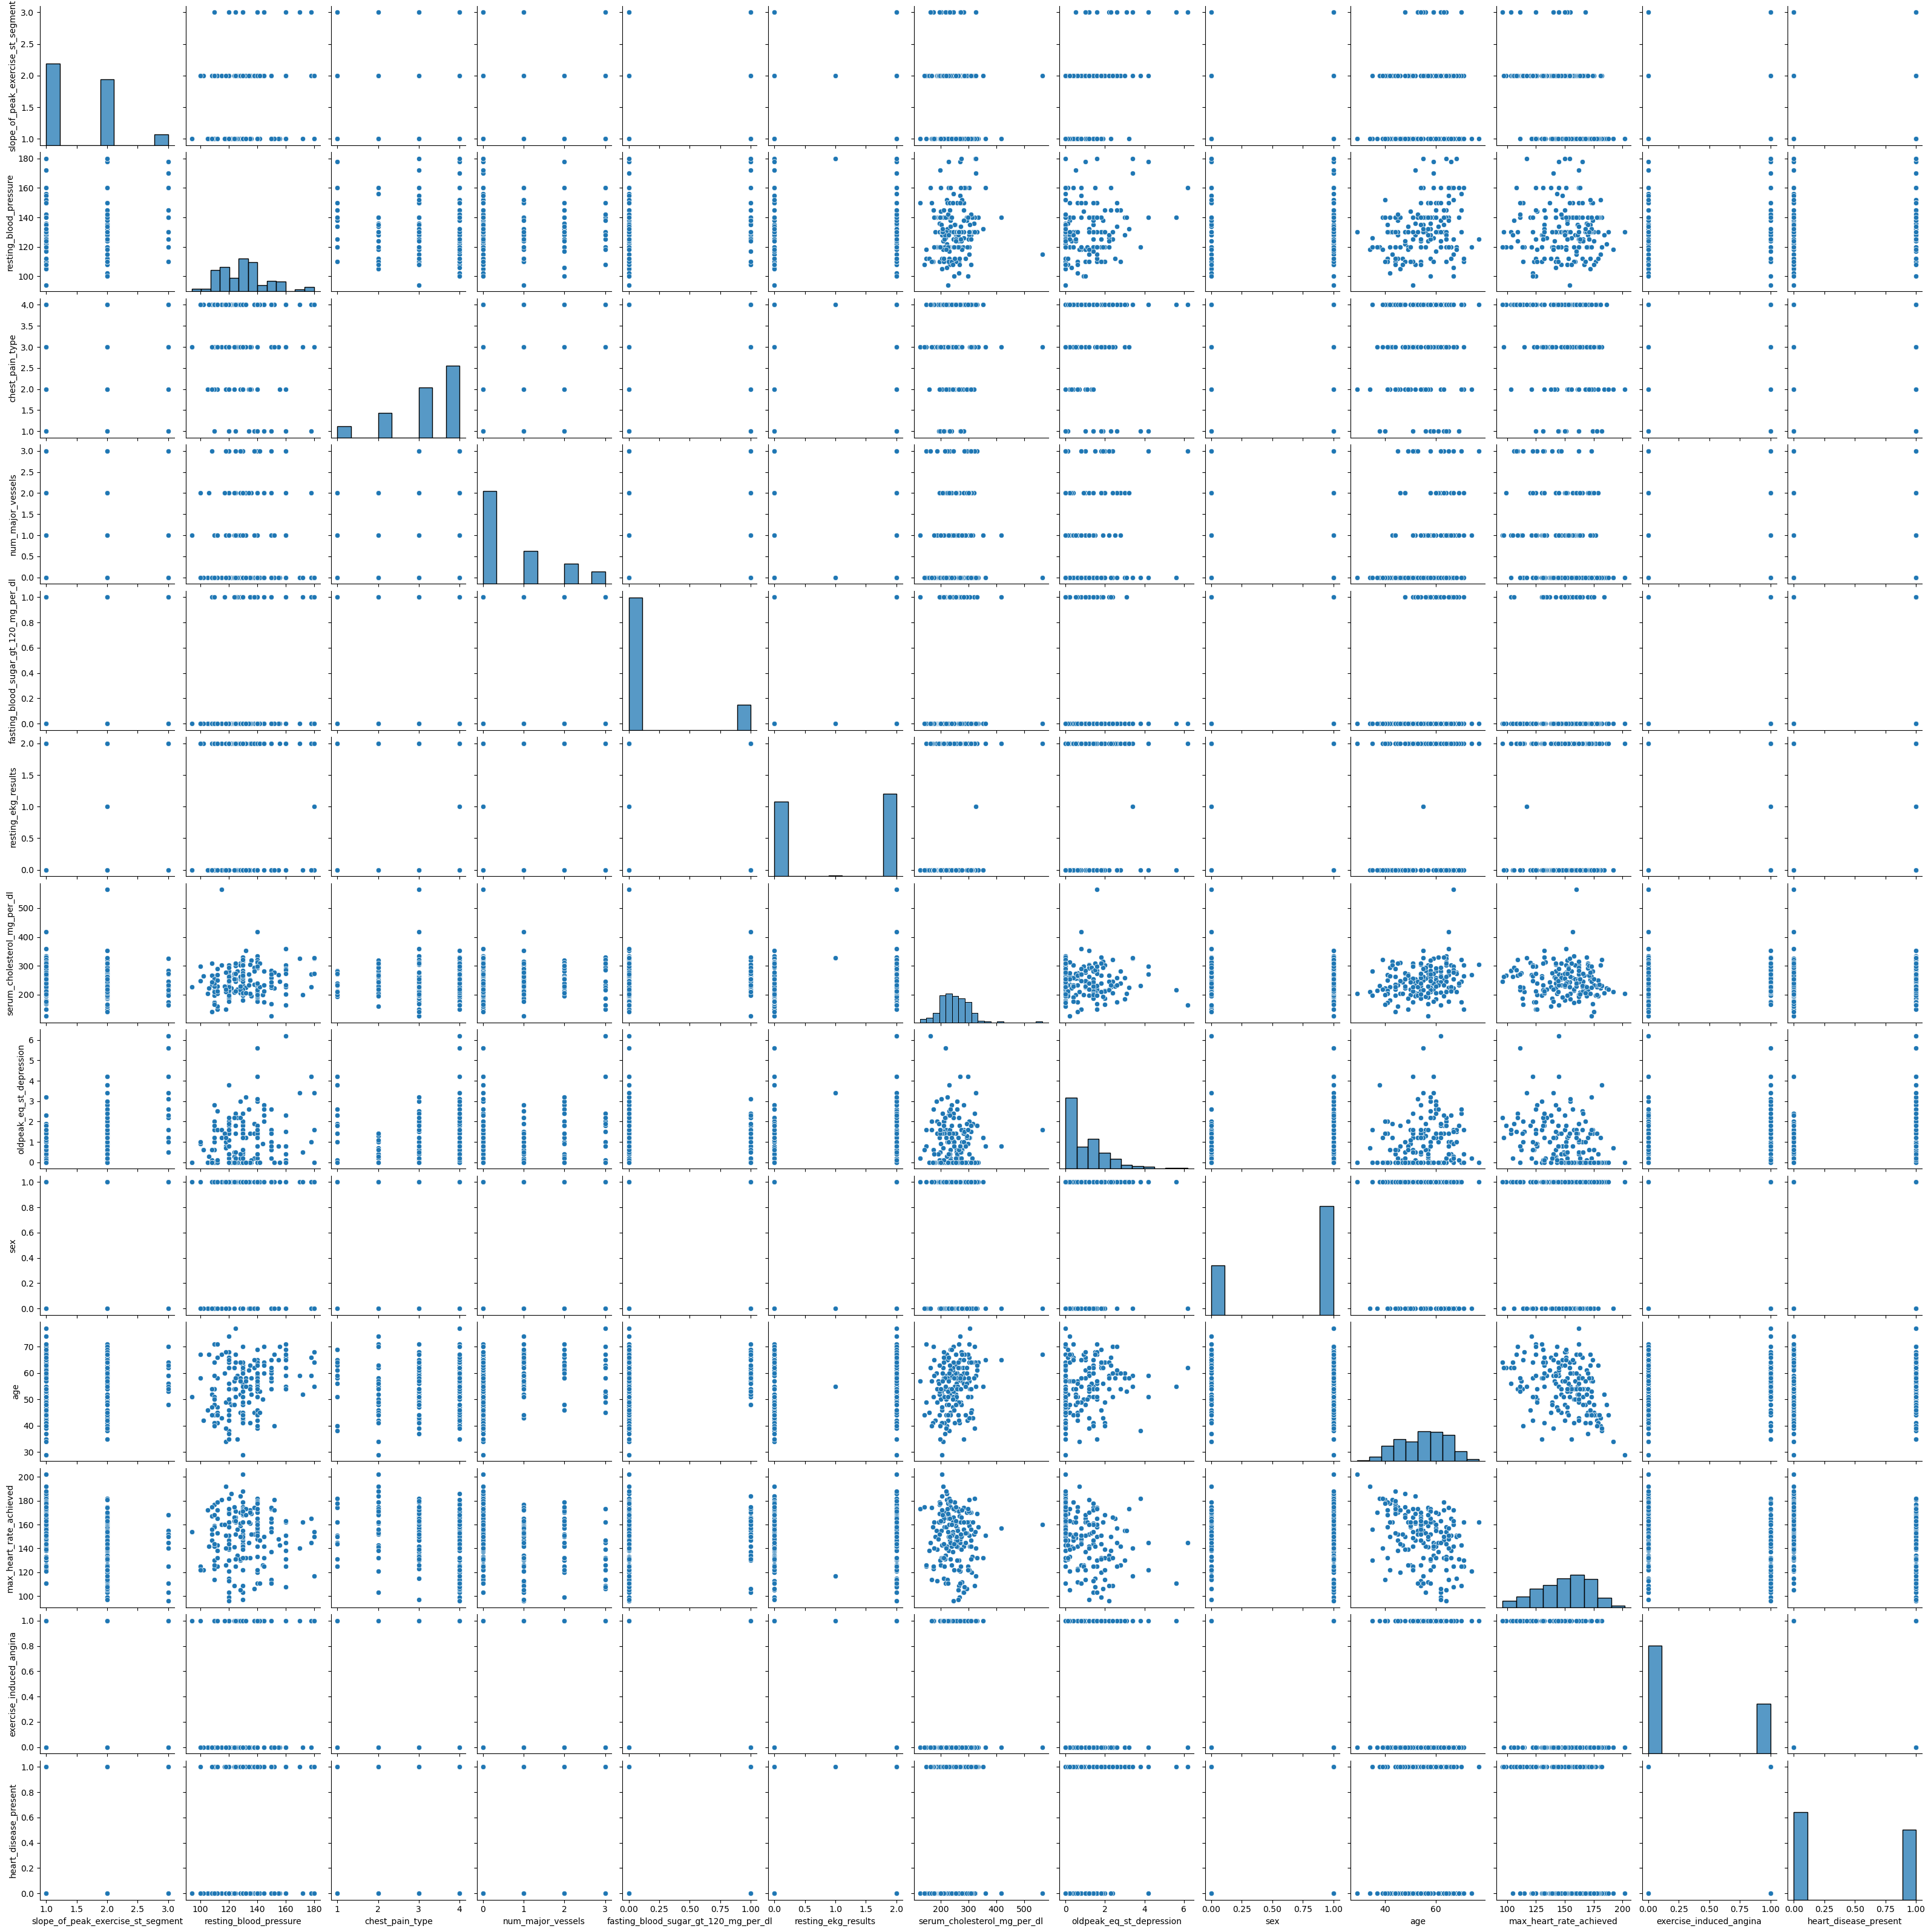

In [289]:
sns.pairplot(data)   # create a pairplot

* Here we can not see any insights in any graphs.

**Final Report Of EDA**
* The Univariante Anlysis indicates that the resting_blood_pressure, serum_cholesterol_mg_per_dl, age and max_heart_rate_achieved columns follow normal distribution.
* Increased number of major vessels correlates with a higher probability of heart disease.
* Chest pain type 4 and resting EKG result 1 are strongly associated with heart disease.
* Males and older individuals show a higher prevalence of heart disease.
* The exercise-induced angina may be a potential indicator of heart disease.

## Feature Engineering

**Feature Engineering** :- It is the process of using domain knowledge to select, modify or create new features from raw data that can improve the performance of machine learning model. It involves transforming raw data into a format that is more suitable for modeling and can significantly impact model accuracyand effectiveness.

### 1. Data Preprocessing

**Data preprocessing** :- It is a crucial step in machine learning that involves transforming raw data into a clean and usable format. This process ensures that the data is suitable for analysis and modeling, ultimately improving the performance and accuracy of machine learning models

In [13]:
data.isnull().sum()   # check the null values

slope_of_peak_exercise_st_segment       0
thal                                    0
resting_blood_pressure                  0
chest_pain_type                         0
num_major_vessels                       0
fasting_blood_sugar_gt_120_mg_per_dl    0
resting_ekg_results                     0
serum_cholesterol_mg_per_dl             0
oldpeak_eq_st_depression                0
sex                                     0
age                                     0
max_heart_rate_achieved                 0
exercise_induced_angina                 0
heart_disease_present                   0
dtype: int64

* Here we can not see the null values.

#### Handling Outliers

Outliers are data points that differ significantly from the majority of the data, often due to variability, errors, or unusual conditions. They can distort statistical analyses and model predictions if not properly hnadled.

In [14]:
# assign continuous values
con_col = data[['age','resting_blood_pressure','serum_cholesterol_mg_per_dl', 'oldpeak_eq_st_depression','max_heart_rate_achieved']]

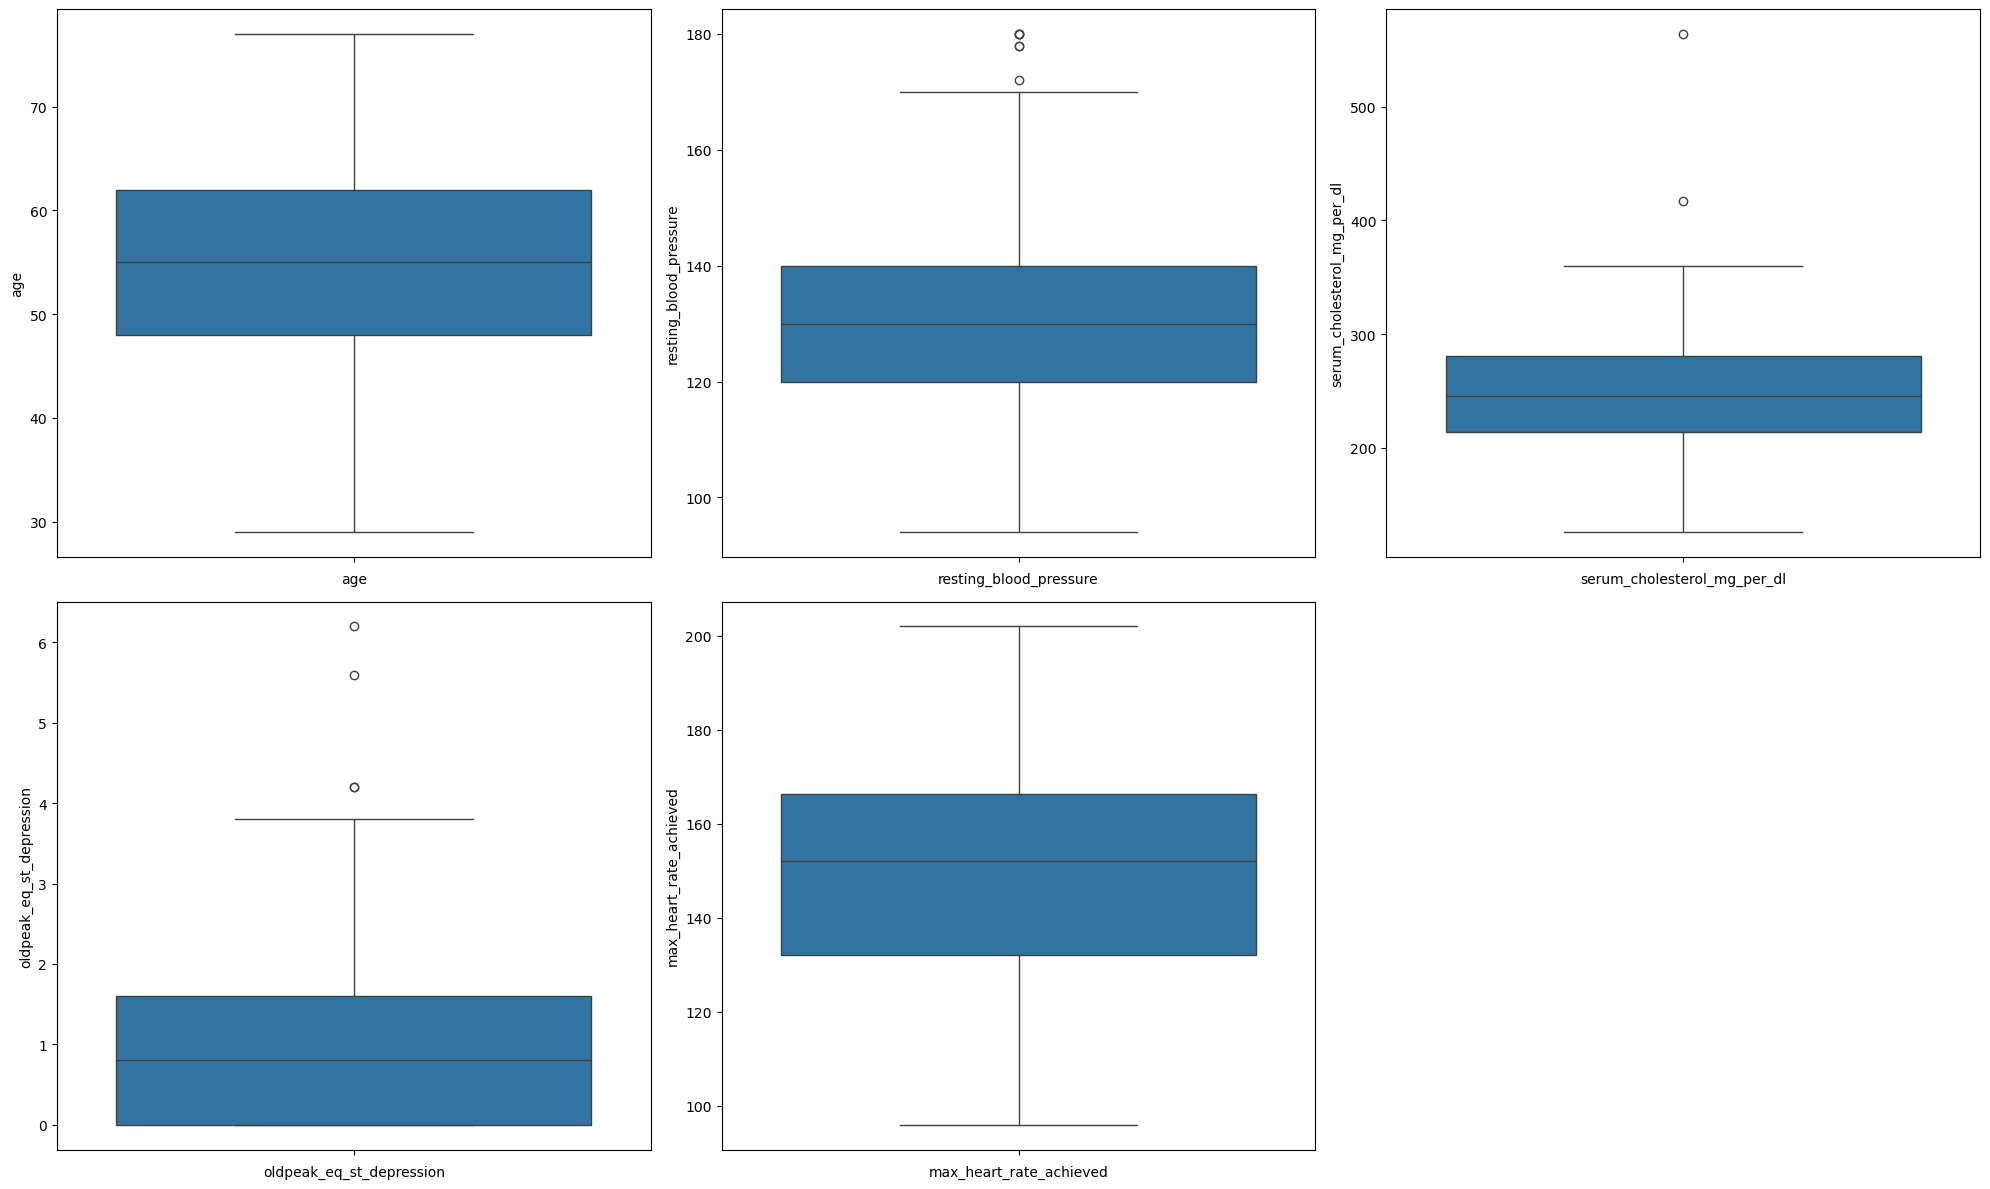

In [15]:
# check the outliers in the dataset
plt.figure(figsize=(20,12),facecolor='white')  # define the plot size
plt_num = 1
for i in con_col:  # define for loop
    if plt_num <=5 :  # apply if condition 
        plt.subplot(2,3,plt_num) # assign raw and column
        sns.boxplot(con_col[i])  # create boxplot
        plt.xlabel(i)  # assign the xlabel value
        plt.ylabel(i)  # assign the ylabel value
        plt_num = plt_num  + 1  # increment
plt.tight_layout() # use for show data

In [16]:
# handle the outliers
data.loc[data.resting_blood_pressure > 170 , "resting_blood_pressure"] = data.resting_blood_pressure.median()

<Axes: xlabel='resting_blood_pressure'>

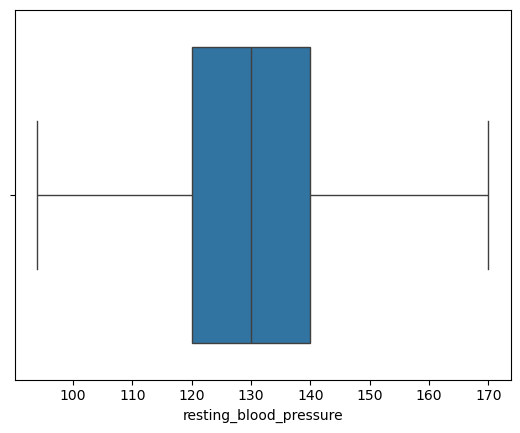

In [17]:
sns.boxplot(x = data.resting_blood_pressure)  # create a boxplot

In [18]:
# handle the outliers
data.loc[data.serum_cholesterol_mg_per_dl > 400 , "serum_cholesterol_mg_per_dl"] = data.serum_cholesterol_mg_per_dl.median()

<Axes: xlabel='serum_cholesterol_mg_per_dl'>

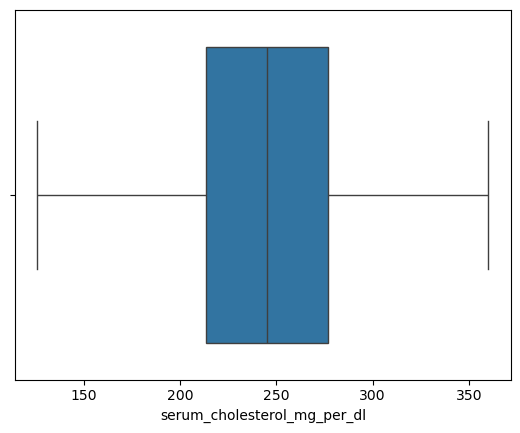

In [19]:
sns.boxplot(x=data.serum_cholesterol_mg_per_dl) # create a boxplot

In [20]:
# handle the outliers
data.loc[data.oldpeak_eq_st_depression > 4 , "oldpeak_eq_st_depression"] = data.oldpeak_eq_st_depression.median()

<Axes: xlabel='oldpeak_eq_st_depression'>

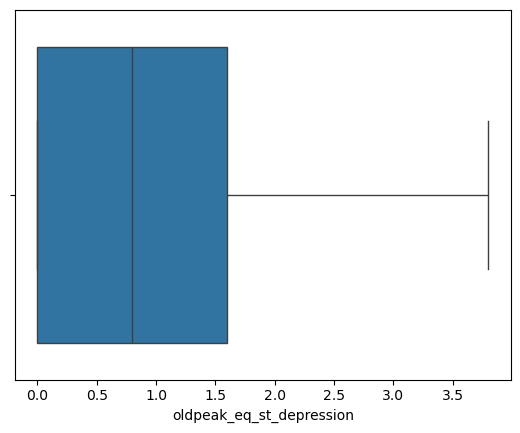

In [21]:
sns.boxplot(x = data.oldpeak_eq_st_depression) # create a boxplot

#### Encoding

Encoding is a technique which is used to convert the cateorical data into a numerical data.

* There are three types of encoding :-
    1) Label Encoder
    2) Ordinal Encoder
    3) One Hot Encoder

In [22]:
data.thal.unique()  # find unique values in thal column

array(['normal', 'reversible_defect', 'fixed_defect'], dtype=object)

* The thal column not follow the order, so we will use LabelEncoder or OneHotEncoder
* Here we apply the LabelEncoder on thal column.

In [23]:
from sklearn.preprocessing import LabelEncoder  # import lableEncoder
encoder = LabelEncoder()  # create an instance object

In [24]:
data['thal'] = encoder.fit_transform(data.thal)  # transform the categorical value into numerical in thal column

In [25]:
data.head()  # showing first 5 rows

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,1,1,128,2,0,0,2,308.0,0.0,1,45,170,0,0
1,2,1,110,3,0,0,0,214.0,1.6,0,54,158,0,0
2,1,1,125,4,3,0,2,304.0,0.0,1,77,162,1,1
3,1,2,152,4,0,0,0,223.0,0.0,1,40,181,0,1
4,3,2,130,1,0,0,2,270.0,0.8,1,59,145,0,0


#### Scaling :

Scaling is a technique which is used to transform the continuous value into a certain range.
Scaling is very important for continuous feature because some model give more priority to that features which has highest values.

* There are two types of scaling :-
    1) MinMaxScaler
    2) StandardScaler

In [26]:
from sklearn.preprocessing import MinMaxScaler  # import MinMaxScaler
scaler = MinMaxScaler()   # create an instance object

In [27]:
# assign a continuous value for scaling
sc = ['resting_blood_pressure','serum_cholesterol_mg_per_dl','oldpeak_eq_st_depression','max_heart_rate_achieved','age']
data[sc] = scaler.fit_transform(data[sc])  # transform the data into 0 to 1 range

In [28]:
data.head()  # showing first 5 rows

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,1,1,0.447368,2,0,0,2,0.777778,0.000000,1,0.333333,0.698113,0,0
1,2,1,0.210526,3,0,0,0,0.376068,0.421053,0,0.520833,0.584906,0,0
2,1,1,0.407895,4,3,0,2,0.760684,0.000000,1,1.000000,0.622642,1,1
3,1,2,0.763158,4,0,0,0,0.414530,0.000000,1,0.229167,0.801887,0,1
4,3,2,0.473684,1,0,0,2,0.615385,0.210526,1,0.625000,0.462264,0,0


In [29]:
data.heart_disease_present.value_counts()

heart_disease_present
0    100
1     80
Name: count, dtype: int64

### 2. Feature Selection

**Feature Selection:-** It is the process of identifying and selecting a subset of relevant features (variables, predictors) from a larger set of available features in a dataset. The goal of feature selection is to improve the performance of machine learning models by retaining only the most important and informative features, while eliminating redundant or irrelevant ones.

<Axes: >

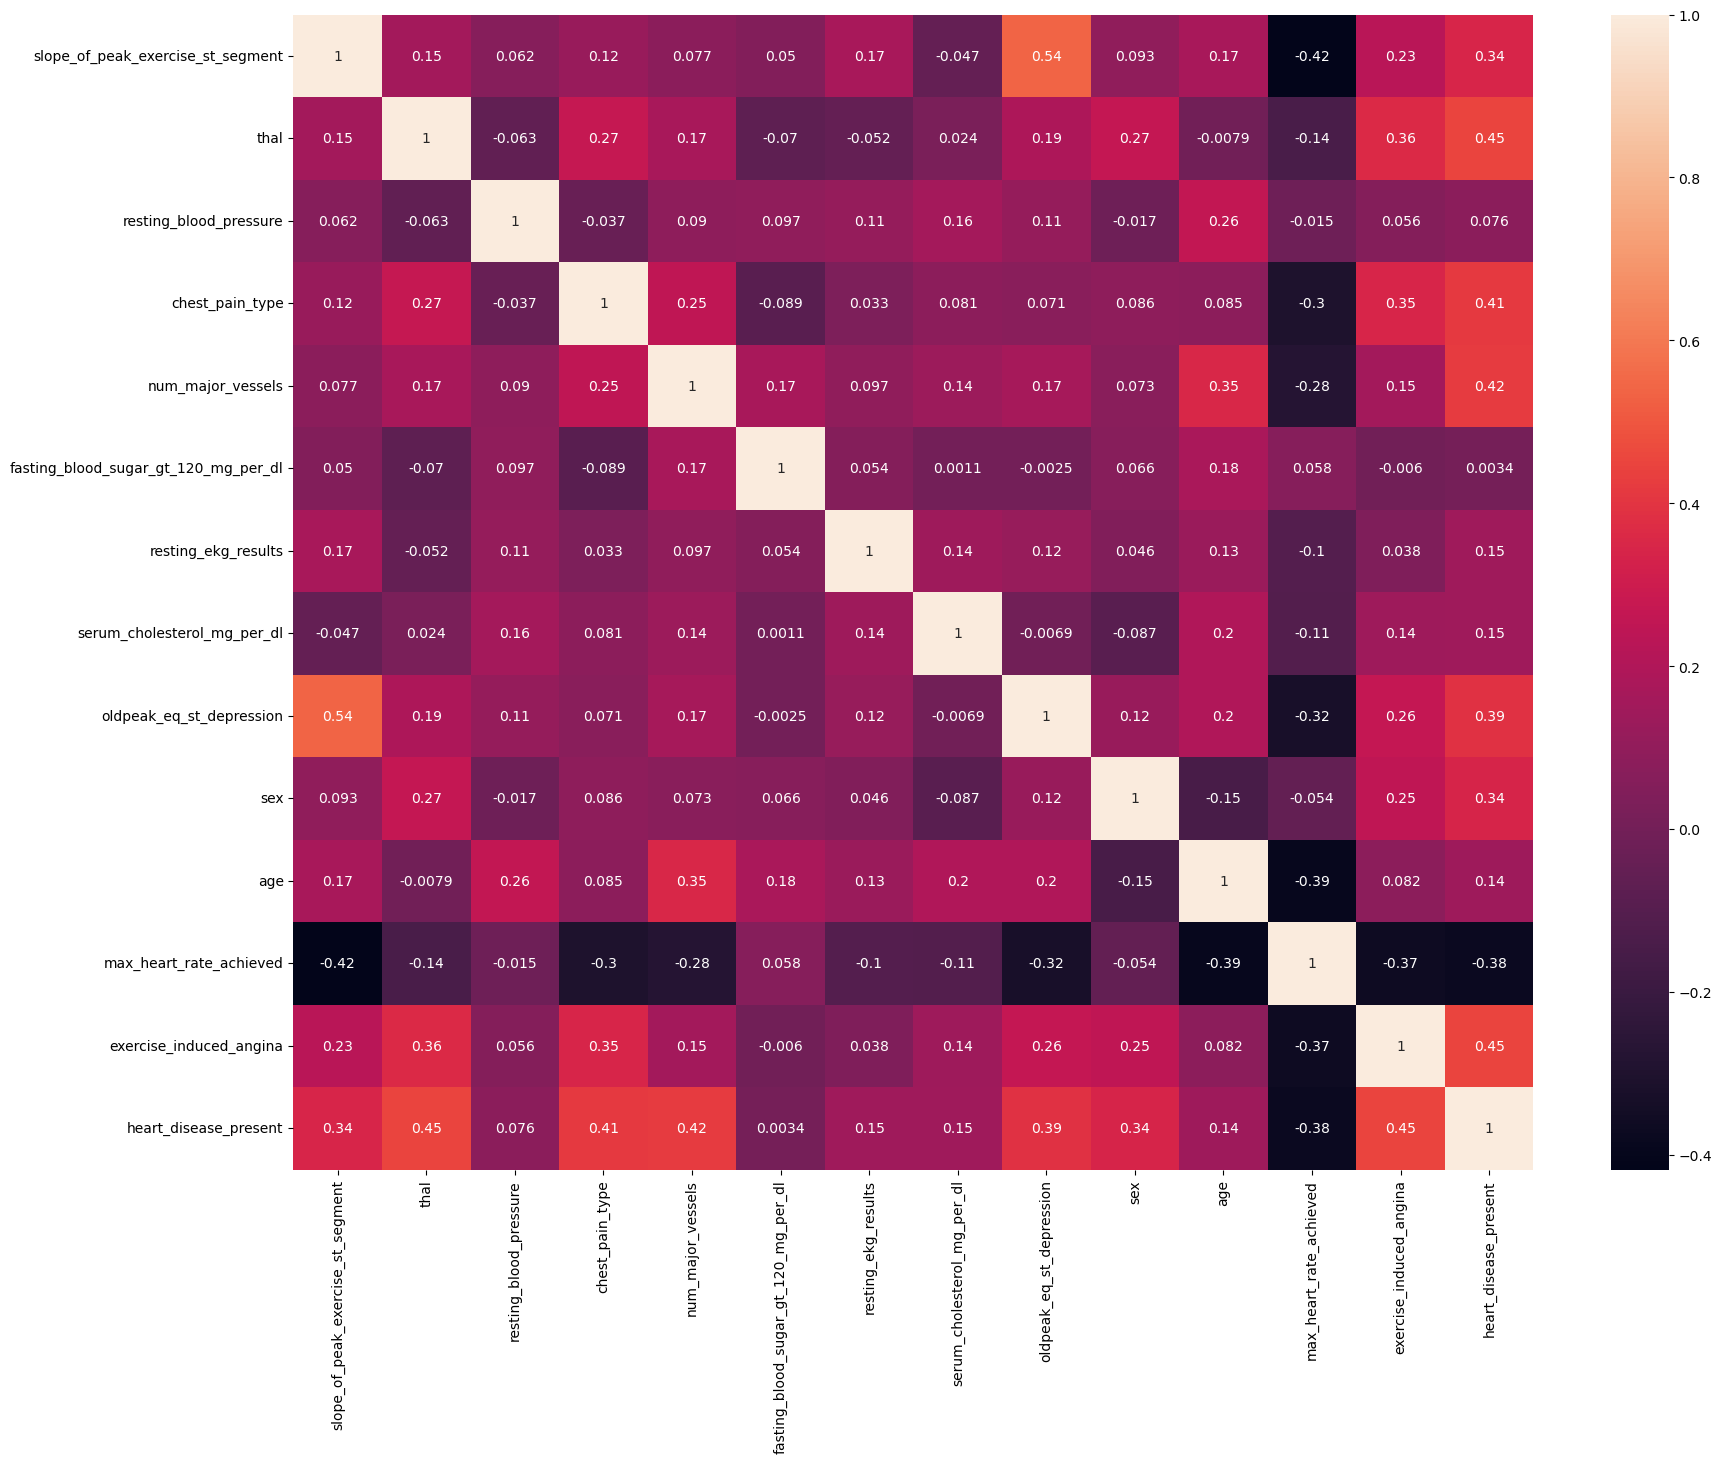

In [306]:
plt.figure(figsize=(20,15))  # define figure size
sns.heatmap(data.corr(),annot=True)  # create heatmap for check the correlation

**Insights**
* Here we can not see the high correlation between any independent columns.
* Here we can see very less correlation 0.0034 between fasting_blood_sugar_gt_120_mg_per_dl and hear_disease_present column.
    * so we can drop the fasting_blood_sugar_gt_120_mg_per_dl column.

In [307]:
# drop the fasting_blood_sugar_gt_120_mg_per_dl column
data1.drop('fasting_blood_sugar_gt_120_mg_per_dl',axis=1,inplace=True) 

### Model Creation :

In [308]:
x = data.drop('heart_disease_present',axis=1)  # define independent columns
y = data['heart_disease_present']  # define dependent column

In [309]:
x   #check the independent variables

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,1,1,0.447368,2,0,0,2,0.777778,0.000000,1,0.333333,0.698113,0
1,2,1,0.210526,3,0,0,0,0.376068,0.421053,0,0.520833,0.584906,0
2,1,1,0.407895,4,3,0,2,0.760684,0.000000,1,1.000000,0.622642,1
3,1,2,0.763158,4,0,0,0,0.414530,0.000000,1,0.229167,0.801887,0
4,3,2,0.473684,1,0,0,2,0.615385,0.210526,1,0.625000,0.462264,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,2,2,0.407895,4,2,1,0,0.547009,0.052632,1,0.791667,0.632075,0
176,2,1,0.473684,4,0,0,1,0.858974,0.894737,0,0.541667,0.198113,1
177,2,2,0.407895,3,0,0,0,0.782051,0.473684,1,0.729167,0.330189,1
178,1,1,0.394737,3,2,1,0,0.551282,0.000000,1,0.395833,0.745283,0


In [310]:
y   # check the dependent variable

0      0
1      0
2      1
3      1
4      0
      ..
175    1
176    1
177    1
178    0
179    0
Name: heart_disease_present, Length: 180, dtype: int64

#### Split the data into training and testing

In [311]:
from sklearn.model_selection import train_test_split  # import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=40)  # split the data into training and testing

In [312]:
x_train  # check the independent training data

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
146,1,2,0.605263,1,0,0,0,0.311966,0.368421,1,0.229167,0.773585,1
139,1,1,0.473684,2,0,0,2,0.397436,0.000000,1,0.312500,0.867925,0
64,1,1,0.210526,4,0,0,2,0.547009,0.000000,0,0.437500,0.594340,0
59,1,1,0.210526,4,1,0,2,0.303419,0.000000,1,0.312500,0.764151,0
62,3,2,0.473684,4,0,1,2,0.670940,0.421053,1,0.562500,0.066038,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12,1,1,0.605263,3,0,0,0,0.893162,0.000000,1,0.729167,0.584906,0
50,2,2,0.605263,4,2,0,0,0.790598,0.473684,1,0.354167,0.226415,1
165,1,1,0.763158,3,1,0,0,0.645299,0.000000,0,0.791667,0.716981,0
7,2,0,0.736842,4,1,0,2,0.641026,0.157895,1,0.583333,0.150943,1


In [313]:
x_test   # check the independent testing data

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
67,2,1,0.276316,4,0,0,0,0.756410,0.315789,1,0.291667,0.801887,0
5,1,1,0.473684,3,0,0,0,0.230769,0.000000,1,0.270833,0.509434,0
160,1,1,0.473684,2,0,0,0,0.598291,0.157895,1,0.416667,0.707547,0
132,1,1,0.473684,2,0,0,2,0.333333,0.368421,0,0.250000,0.716981,0
164,1,2,0.631579,4,0,0,2,0.427350,0.000000,1,0.500000,0.141509,1
124,2,1,0.868421,4,3,0,2,0.683761,0.394737,1,0.791667,0.113208,1
152,2,2,0.342105,4,0,0,0,0.307692,0.421053,1,0.125000,0.320755,1
126,2,1,0.105263,4,0,0,2,0.594017,0.157895,0,0.270833,0.245283,0
35,1,1,0.368421,4,0,0,2,0.410256,0.000000,1,0.395833,0.849057,0
173,1,2,0.605263,4,0,0,0,0.739316,0.421053,1,0.458333,0.726415,1


In [314]:
y_train  # check the dependent training data

146    0
139    0
64     0
59     1
62     1
      ..
12     1
50     1
165    0
7      1
70     0
Name: heart_disease_present, Length: 144, dtype: int64

In [315]:
y_test  # check the dependent testing data

67     0
5      0
160    0
132    0
164    0
124    1
152    1
126    0
35     0
173    1
127    0
26     0
148    1
129    1
79     1
119    1
120    1
37     0
28     1
23     0
140    1
136    1
85     1
170    1
18     0
161    1
106    0
155    1
154    1
42     0
122    0
11     0
69     1
130    0
166    0
52     1
Name: heart_disease_present, dtype: int64

## Model Selction

### Logstic Regression

In [316]:
from sklearn.linear_model import LogisticRegression   #import LogisticRegression

In [317]:
lr = LogisticRegression()   # create an instance object
lr.fit(x_train,y_train)   # train the model

LogisticRegression()

In [318]:
lr_pred = lr.predict(x_test)   # predict the testing data

In [319]:
# import the classification metrics
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,classification_report  

In [320]:
accuracy_score(y_test,lr_pred)  # check the model performance

0.7222222222222222

In [321]:
f1_score(y_test,lr_pred)   # check the f1_score

0.7222222222222222

In [322]:
print(classification_report(y_test,lr_pred))  # check the classification report

              precision    recall  f1-score   support

           0       0.72      0.72      0.72        18
           1       0.72      0.72      0.72        18

    accuracy                           0.72        36
   macro avg       0.72      0.72      0.72        36
weighted avg       0.72      0.72      0.72        36



In [323]:
y_tr_lr = lr.predict(x_train)  # predict the training data
accuracy_score(y_train,y_tr_lr)  # check the model performance

0.8680555555555556

<Axes: xlabel='heart_disease_present', ylabel='Density'>

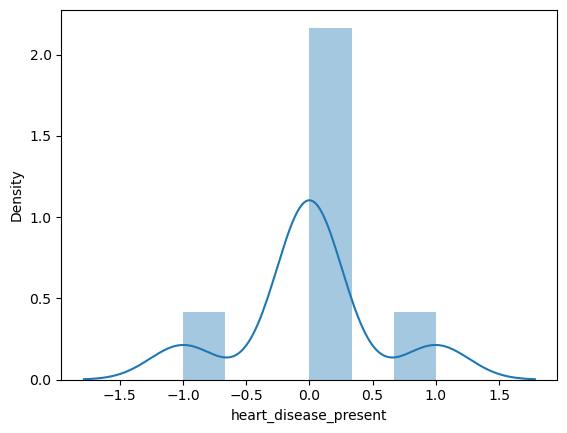

In [324]:
error = y_test - lr_pred  # assign error value
sns.distplot(error,kde=True)  # plot the error value

* Linear Regression model is not give the generalize model. It's testing accuracy is 0.72 and training accuracy is 0.86.
* Linear Regression model required the hyperparameter tuning.

In [325]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [50]:
# Set up the parameter grid for hyperparameter tuning
param_grid = {
    'C': [0.1, 1, 10, 0.01],                 # Regularization strength
    'penalty': ['l1', 'l2'],                 # Regularization penalty type
    'solver': ['liblinear', 'saga'],         # Solvers (note: l1 is only supported by 'liblinear' and 'saga')
    'max_iter': [100, 200, 300],             # Maximum number of iterations
}

log = LogisticRegression()  # create an instance object

#apply GridSearchCV
grid = GridSearchCV(estimator=log, param_grid=param_grid,refit=True,verbose=2,n_jobs=-1,cv=5,scoring='accuracy')
grid.fit(x_train,y_train)  # fit GridSearchCV

grid.best_params_   # shows the best parameters

Fitting 5 folds for each of 48 candidates, totalling 240 fits


{'C': 1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}

In [51]:
y_pred = grid.predict(x_test)  ## predict the testing data
print(accuracy_score(y_test,y_pred))
print(f1_score(y_test,y_pred))

0.8055555555555556
0.7999999999999999


In [52]:
y_tr_pred = grid.predict(x_train)  ## predict the training data
accuracy_score(y_train,y_tr_pred)

0.8888888888888888

* After hyperparameter tuning, the model increase the accuracy score at 0.83 but still it is not generalized model.

In [326]:
# Here we try to change random_state and make a generalized model
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=43) # spli the data
log_reg = LogisticRegression(C=1,max_iter=100,penalty='l2',solver='liblinear')  # create an instance object
log_reg.fit(x_train,y_train)  # train the data
y_pred1 = log_reg.predict(x_test)  ## predict the testing data

In [327]:
a1 = accuracy_score(y_test,y_pred1)  # check the model performance
a1

0.8888888888888888

In [328]:
f1_1 = f1_score(y_test,y_pred1) # chcek f1_score
f1_1

0.8571428571428571

In [329]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91        20
           1       1.00      0.75      0.86        16

    accuracy                           0.89        36
   macro avg       0.92      0.88      0.88        36
weighted avg       0.91      0.89      0.89        36



In [57]:
y_tr_pred1 = grid.predict(x_train)  ## predict the training data
accuracy_score(y_train,y_tr_pred1)  # check the model performance

0.8680555555555556

**Conclusion**
* Logistic regression model gives the generalize model.
* It's testing accuracy is 0.88 and training accuracy is 0.86.

### SVM : Support Vector Machine

In [330]:
from sklearn.svm import SVC  # import SVC

In [331]:
svc = SVC()  # create an instance object
svc.fit(x_train,y_train)  # train the model

SVC()

In [332]:
svc_pred = svc.predict(x_test)  # predict the testing data

In [333]:
accuracy_score(y_test,svc_pred)  # check the model performance

0.8888888888888888

In [334]:
f1_score(y_test,svc_pred)  # check the f1 score

0.8571428571428571

In [335]:
print(classification_report(y_test,svc_pred))  # check the classification report

              precision    recall  f1-score   support

           0       0.83      1.00      0.91        20
           1       1.00      0.75      0.86        16

    accuracy                           0.89        36
   macro avg       0.92      0.88      0.88        36
weighted avg       0.91      0.89      0.89        36



In [336]:
y_tr_svc = svc.predict(x_train)
accuracy_score(y_train,y_tr_svc)

0.8819444444444444

<Axes: xlabel='heart_disease_present', ylabel='Density'>

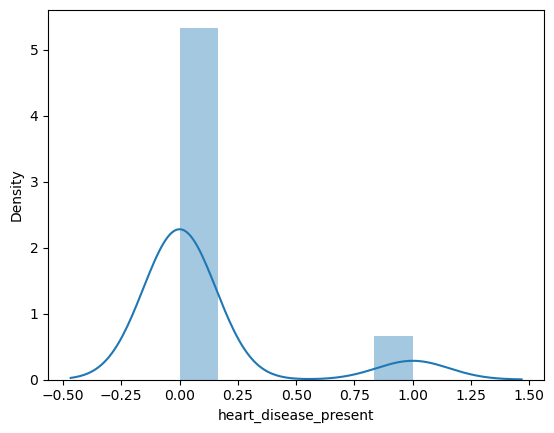

In [337]:
error = y_test - svc_pred
sns.distplot(error, kde=True)

**Conclusion**
* SVM model gives the generalize model. It's testing accuracy is 0.88 and training accuracy is 0.88.
* Error also follow the normal distribution.
* We apply a hyperparameter tuning for increase the model performance.

In [77]:
# Set up the parameter grid for hyperparameter tuning
param_grid = {
    'C': [0.1,10,1,100],
    'gamma' : ['auto','scale'],
    'kernel':['linear','poly','sigmoid','rbf']
}

svc1 = SVC()  # create an instance object
# set GridSearchCV
random_cv = RandomizedSearchCV(estimator= svc1, param_distributions=param_grid,n_jobs=-1,verbose=2,n_iter=50,refit=True,random_state=40,scoring='f1')
random_cv.fit(x_train,y_train) # Fit GridSearchCV

random_cv.best_params_  # shows the best Paramteres

Fitting 5 folds for each of 32 candidates, totalling 160 fits


{'kernel': 'rbf', 'gamma': 'auto', 'C': 1}

In [78]:
y_svc =random_cv.predict(x_test)  # predict the testing data
print(accuracy_score(y_test,y_svc))  # check the model performance
print(f1_score(y_test,y_svc))  # chcek f1_score

0.8888888888888888
0.8571428571428571


In [79]:
y_tr_svc = random_cv.predict(x_train)  ## predict the training data
accuracy_score(y_train,y_tr_svc)  # check the model performance

0.8819444444444444

* After hyperparameter tuning, the model not increase the accuracy score.

In [338]:
# Here we try to change random_state and make a generalized model
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=3) # split the data 
svc2 = SVC(kernel='rbf',gamma='auto',C=1)  # create an instance object
svc2.fit(x_train,y_train)  # train the data
y_pred2 = svc2.predict(x_test)  ## predict the testing data

In [339]:
a2 = accuracy_score(y_test,y_pred2)   # check the model performance
a2

0.9166666666666666

In [340]:
f1_2 = f1_score(y_test,y_pred2)   # check the f1 score
f1_2

0.88

In [341]:
y_pred = svc2.predict(x_train) # predict the training data
accuracy_score(y_train,y_pred) # check the model performance

0.8819444444444444

**Conclusion**
* SVM model gives the generalize model. 
* It's testing accuracy is 0.91 and training accuracy is 0.88.

### Decision Tree Algorithm

In [342]:
from sklearn.tree import DecisionTreeClassifier  # import DecisionTree Classifier

In [343]:
dt = DecisionTreeClassifier(random_state=35)  # create an instance object
dt.fit(x_train,y_train)   # train the model

DecisionTreeClassifier(random_state=35)

In [344]:
dt_pred = dt.predict(x_test)  # predict the testing data

In [345]:
accuracy_score(y_test,dt_pred)  # check the model performance

0.6388888888888888

In [346]:
f1_score(y_test,dt_pred)  # check the f1 score

0.5517241379310344

In [347]:
print(classification_report(y_test,dt_pred))  # check the classification report

              precision    recall  f1-score   support

           0       0.71      0.68      0.70        22
           1       0.53      0.57      0.55        14

    accuracy                           0.64        36
   macro avg       0.62      0.63      0.62        36
weighted avg       0.64      0.64      0.64        36



In [348]:
y_tr_dt = dt.predict(x_train)  # predict the trainig data
accuracy_score(y_train,y_tr_dt) # check the model performance

1.0

<Axes: xlabel='heart_disease_present', ylabel='Density'>

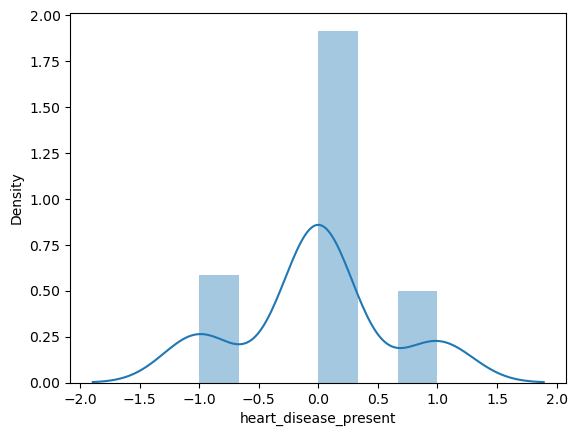

In [349]:
error = y_test - dt_pred
sns.distplot(error, kde=True)

* decision tree model occurs over fitting based on testing accuracy 0.63 and training accuracy 1.00.
* DecisionTree model not gives the generalize model. 
* DecisionTree model required the hyperparameter tuning.
* Error also not follow the normal distribution.

In [123]:
# Set up the parameter grid for hyperparameter tuning
param_grid = {
    'criterion':['gini','entropy'],
    'splitter':['best','randoom'],
    'max_depth' : list(range(1,15)),
    'min_samples_split' : [2,3,5,7,10],
    'min_samples_leaf' : list(range(1,15))
}

dt1 = DecisionTreeClassifier()  ## create an instance object
# set RandomizedSearchCV
random = RandomizedSearchCV(estimator=dt1,param_distributions=param_grid,n_jobs=-1,n_iter=20,refit=True,verbose=2,scoring='accuracy',random_state=0)
random.fit(x_train,y_train)  # fit RandomizedSearchCV

random.best_params_   # shows the best parameters


Fitting 5 folds for each of 20 candidates, totalling 100 fits


{'splitter': 'best',
 'min_samples_split': 3,
 'min_samples_leaf': 7,
 'max_depth': 9,
 'criterion': 'entropy'}

In [124]:
y_dt =random.predict(x_test)  # predict the testing data
print(accuracy_score(y_test,y_dt))  # check the model performance
print(f1_score(y_test,y_dt))  # chcek f1_score

0.6111111111111112
0.5


In [125]:
y_tr_dt = random.predict(x_train)  ## predict the training data
accuracy_score(y_train,y_tr_dt)  # check the model performance

0.875

* After appling Hyperparameter tuning, the model occurs the overfiting.

In [350]:
# Here we try to change random_state and make a generalized model
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=31) # split the data 
# create an instance object
dt2 = DecisionTreeClassifier(splitter='best',min_samples_split= 3,min_samples_leaf= 8,max_depth= 13,criterion='gini')
dt2.fit(x_train,y_train)  # train the data
y_pred3 = dt2.predict(x_test)  ## predict the testing data

In [351]:
a3 = accuracy_score(y_test ,y_pred3)  # check the model performance
a3

0.8611111111111112

In [352]:
f1_3 = f1_score(y_test,y_pred3)  # check the f1 score
f1_3

0.8275862068965517

In [353]:
y_pred_dt = dt2.predict(x_train)  # predict the training data
accuracy_score(y_train,y_pred_dt)  # check the model performance

0.8541666666666666

**Conclusion**
* Decision Tree model gives the generalize model.
* It's testing accuracy is 0.86 and training accuracy is 0.85.

### Bagging Algorithm

In [354]:
from sklearn.ensemble import BaggingClassifier  # import BaggingClassifier

In [355]:
bg = BaggingClassifier()  # create an instance object
bg.fit(x_train,y_train)   # train the model

BaggingClassifier()

In [356]:
bg_pred = bg.predict(x_test)  # predict the testing data

In [357]:
accuracy_score(y_test,bg_pred)  # check the model performance

0.7777777777777778

In [358]:
f1_score(y_test,bg_pred)  # check the f1 score

0.7142857142857143

In [359]:
print(classification_report(y_test,bg_pred))  # check the classification report

              precision    recall  f1-score   support

           0       0.75      0.90      0.82        20
           1       0.83      0.62      0.71        16

    accuracy                           0.78        36
   macro avg       0.79      0.76      0.77        36
weighted avg       0.79      0.78      0.77        36



In [360]:
y_tr_bg = bg.predict(x_train)  # predict the training data
accuracy_score(y_train,y_tr_bg)  # check the model performance

1.0

<Axes: xlabel='heart_disease_present', ylabel='Density'>

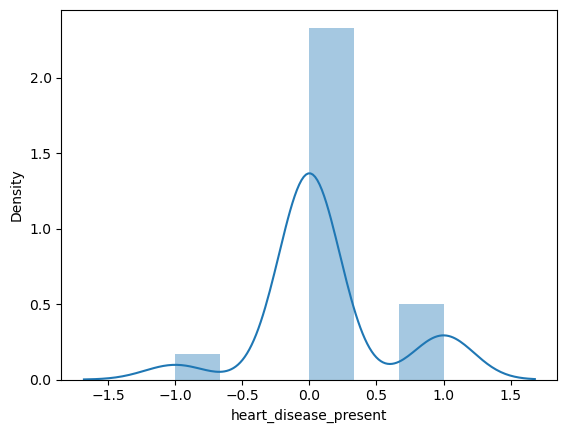

In [361]:
error = y_test  - bg_pred  # assign error value
sns.distplot(error,kde=True)  # plot the error value

* BaggingClassifier model occurs over fitting based on testing accuracy 0.77 and training accuracy 0.99.
* BaggingClassifier model not gives the generalize model. 
* Error also not follow the normal distribution.

In [362]:
# Here we try to change random_state and make a generalized model
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=34) # split the data
bg1 = BaggingClassifier(n_estimators=50, max_samples=0.8, max_features=0.8, bootstrap=True, random_state=1) # craete an instance object
bg1.fit(x_train,y_train)  # train the data
y_pred4 = bg1.predict(x_test)  ## predict the testing data

In [363]:
a4 = accuracy_score(y_test ,y_pred4)  # check the model performance
a4

0.9166666666666666

In [364]:
f1_4 = f1_score(y_test,y_pred4)  # check the f1 score
f1_4

0.9142857142857143

In [365]:
y_pred_bg = bg1.predict(x_train)  # predict the training data
accuracy_score(y_train,y_pred_bg)  # check the model performance

0.9930555555555556

**Conclusion**
* Bagging model not gives the generalize model. it occurs over fiting problem.
* It's testing accuracy is 0.91 and training accuracy is 0.99.


### Random Forest Algorithm

In [366]:
from sklearn.ensemble import RandomForestClassifier  # import RandomForestClasiffier

In [367]:
rf = RandomForestClassifier(random_state=25)  # create an instance object
rf.fit(x_train,y_train)  # train the model

RandomForestClassifier(random_state=25)

In [368]:
rf_pred = rf.predict(x_test)  # predict the testing data

In [369]:
accuracy_score(y_test,rf_pred)  # check the model performance

0.9166666666666666

In [370]:
f1_score(y_test,rf_pred)  # check the f1 score

0.9090909090909091

In [371]:
print(classification_report(y_test,rf_pred))  # check the classification report

              precision    recall  f1-score   support

           0       0.90      0.95      0.92        19
           1       0.94      0.88      0.91        17

    accuracy                           0.92        36
   macro avg       0.92      0.91      0.92        36
weighted avg       0.92      0.92      0.92        36



In [372]:
y_tr_rf = rf.predict(x_train)  # predict the training data
accuracy_score(y_train,y_tr_rf)  # check the model performance

1.0

<Axes: xlabel='heart_disease_present', ylabel='Density'>

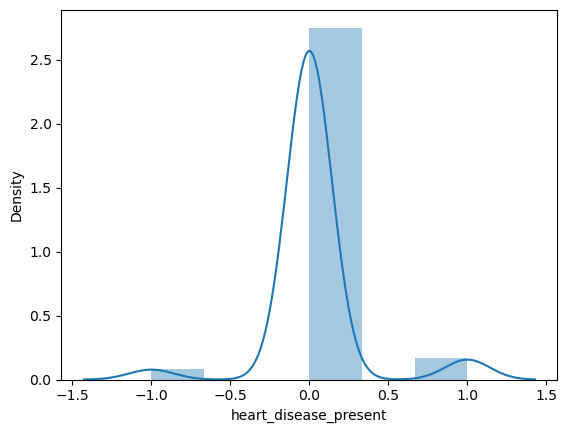

In [373]:
error = y_test - rf_pred   # assign the error value
sns.distplot(error,kde=True)  # plot the error value

* Random Forest model occurs over fitting based on testing accuracy 0.91 and training accuracy 1.00.
* Random Forest model not gives the generalize model. 
* Random Forest model required the hyperparameter tuning.
* Error also not follow the normal distribution.

In [1011]:
# Set up the parameter grid for hyperparameter tuning
param = {
    'n_estimators' : [int(x) for x in np.linspace(start=200, stop=2000, num=5)],   
    'max_features' : ['auto', 'sqrt','log2'],   # max features 
    'max_depth' : [int(x) for x in np.linspace(10, 110, num=5)],  # height of decision tree
    'min_samples_split' : [5, 10],          
    'min_samples_leaf' : [2, 4]
}

rf_cls = RandomForestClassifier(random_state=42)  # craete an instance object
# initialize GridSearchCV
rf_cv = GridSearchCV(estimator=rf_cls, scoring='accuracy',param_grid= param,refit=True, cv=3,verbose=2, n_jobs=-1)
rf_cv.fit(x_train,y_train)  # fit GridSearchCV

rf_cv.best_params_  # shows the best parameters

Fitting 3 folds for each of 300 candidates, totalling 900 fits


{'max_depth': 10,
 'max_features': 'auto',
 'min_samples_leaf': 4,
 'min_samples_split': 5,
 'n_estimators': 1100}

In [1012]:
y_rf =rf_cv.predict(x_test)  # predict the testing data
print(accuracy_score(y_test,y_rf))  # check the model performance
print(f1_score(y_test,y_rf))  # chcek f1_score

0.9444444444444444
0.9411764705882353


In [1013]:
y_tr_rf = rf_cv.predict(x_train)  ## predict the training data
accuracy_score(y_train,y_tr_rf)  # check the model performance

0.9097222222222222

In [374]:
# Here we try to change random_state and make a generalized model
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=34) # split the data
# create an instance object
rf1 = RandomForestClassifier(max_depth=10,random_state=42,max_features='auto',min_samples_split=8,min_samples_leaf=4,n_estimators=800)
rf1.fit(x_train,y_train) # train the model
rf_predict = rf1.predict(x_test)  # predict the testing data

In [375]:
a5 = accuracy_score(y_test,rf_predict)  # check the model performance
a5

0.9444444444444444

In [376]:
f1_5 = f1_score(y_test, rf_predict)  # check the f1 score
f1_5

0.9411764705882353

In [377]:
y_tr_predict = rf1.predict(x_train)  # predict the training data
accuracy_score(y_train,y_tr_predict)  # check the model performance

0.9166666666666666

**Conclusion**
* Random Forest model gives the generalize model.
* It's testing accuracy is 0.94 and training accuracy is 0.91.


### Gradient Boosting Algorithm

In [378]:
from sklearn.ensemble import GradientBoostingClassifier  # import GradientBoostingClassifier

In [379]:
gb = GradientBoostingClassifier(random_state=40)  # create an instance object
gb.fit(x_train,y_train)  # train the model

GradientBoostingClassifier(random_state=40)

In [380]:
gb_pred = gb.predict(x_test)  # predict the testing data

In [381]:
accuracy_score(y_test,gb_pred)  # check the model performance

0.8611111111111112

In [382]:
f1_score(y_test,gb_pred)  # check the f1 score

0.8571428571428571

In [383]:
print(classification_report(y_test,gb_pred))  # check the classification report

              precision    recall  f1-score   support

           0       0.89      0.84      0.86        19
           1       0.83      0.88      0.86        17

    accuracy                           0.86        36
   macro avg       0.86      0.86      0.86        36
weighted avg       0.86      0.86      0.86        36



In [384]:
y_tr_gb = gb.predict(x_train)   # predict teh training data
accuracy_score(y_train,y_tr_gb)  # check the model performance

1.0

<Axes: xlabel='heart_disease_present', ylabel='Density'>

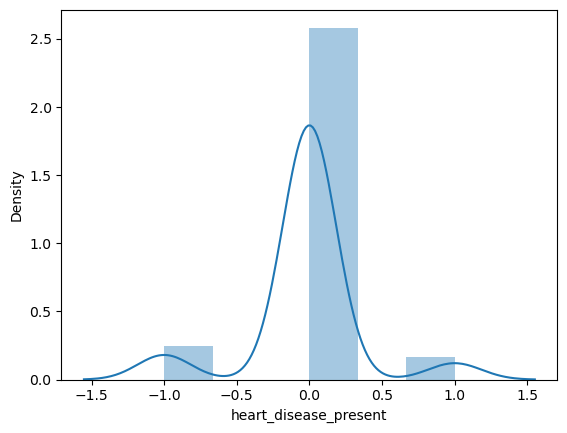

In [385]:
error = y_test - gb_pred  # assign the error value
sns.distplot(error, kde=True)  # plot the error value

* Gradient Boosting model occurs over fitting based on testing accuracy 0.86 and training accuracy 1.00.
* Gradient Boosting model not gives the generalize model. 
* Gradient Boosting model required the hyperparameter tuning.
* Error also not follow the normal distribution.

In [1120]:
# Set up the parameter grid for hyperparameter tuning
param_grid = {
    'learning_rate': [0.01, 0.03, 0.06, 0.1, 0.4, 0.5, 0.6, 0.7],
    'max_depth': [5, 6, 7, 8, 9, 10],
    'n_estimators': [50, 65, 80, 100],
}

GB_cls=GradientBoostingClassifier()  # Assigning GradientBoostingClassifier model into variables
rcv= GridSearchCV(estimator=GB_cls, scoring='accuracy',refit = True,param_grid=param_grid, cv=5, 
                               verbose=2, n_jobs=-1) # initialize GridSearchCV
rcv.fit(x_train,y_train) # fir GridSearchCV

rcv.best_params_  # showing the best paraameters

Fitting 5 folds for each of 192 candidates, totalling 960 fits


{'learning_rate': 0.03, 'max_depth': 5, 'n_estimators': 50}

In [1122]:
y_gb =rcv.predict(x_test)  # predict the testing data
print(accuracy_score(y_test,y_gb))  # check the model performance
print(f1_score(y_test,y_gb))  # chcek f1_score

0.8888888888888888
0.8888888888888888


In [1123]:
y_tr_gb = rcv.predict(x_train)  ## predict the training data
accuracy_score(y_train,y_tr_gb)  # check the model performance

0.9930555555555556

* The Gradient Boosting Model occurs overfiting after appling the hyperparameter tuning.

In [386]:
# Here we try to change random_state and make a generalized model
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=36) # split the data
# create an instance object
gb1 = GradientBoostingClassifier(learning_rate=0.03,max_depth=5,n_estimators=50,random_state=0)
gb1.fit(x_train,y_train) # train the model
gb_predict = gb1.predict(x_test)  # predict the testing data

In [387]:
a6 = accuracy_score(y_test,gb_predict)  # check the model performance
a6

0.8888888888888888

In [388]:
f1_6 = f1_score(y_test,gb_predict)  # check the f1 score
f1_6

0.8947368421052632

In [389]:
y_tr_predict = gb1.predict(x_train)  # predict the training data
accuracy_score(y_train,y_tr_predict)  # check the model performance

0.9930555555555556

**Conclusion**
* Decision Tree model not gives the generalize model after appling the hyperparmeter tuning.
* it gives the overfiting problem.
* It's testing accuracy is 0.88 and training accuracy is 0.99.


### eXtreme Gradient Boosting

In [390]:
from xgboost import XGBClassifier   # import XGBClassifier

In [391]:
xgb = XGBClassifier(random_state=3)  # create an instance object
xgb.fit(x_train,y_train)  # train the model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=3, ...)

In [392]:
xgb_pred = xgb.predict(x_test)  # predict the testing data

In [393]:
a7 = accuracy_score(y_test,xgb_pred)  # check the model performance
a7

0.9444444444444444

In [394]:
f1_7 = f1_score(y_test,xgb_pred)  # check the f1 score
f1_7 

0.9500000000000001

In [395]:
print(classification_report(y_test,xgb_pred))  # check the classification report

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        16
           1       0.95      0.95      0.95        20

    accuracy                           0.94        36
   macro avg       0.94      0.94      0.94        36
weighted avg       0.94      0.94      0.94        36



In [396]:
y_tr_xgb = xgb.predict(x_train)  # predict the training data
accuracy_score(y_train,y_tr_xgb)  # check the model performance

1.0

<Axes: xlabel='heart_disease_present', ylabel='Density'>

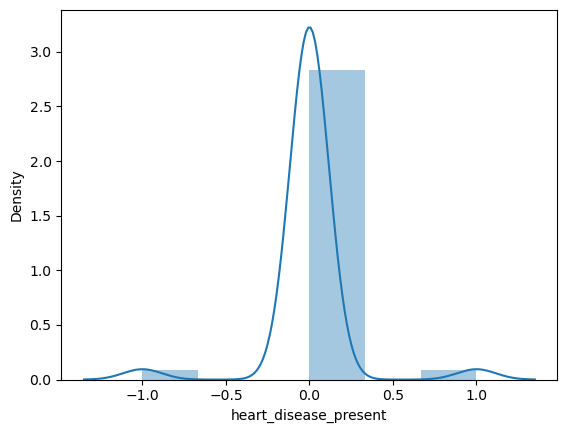

In [397]:
error = y_test - xgb_pred  # assign the error value
sns.distplot(error, kde=True)  # plot the error value

* eXtreme Gradient Boosting model occurs over fitting based on testing accuracy 0.94 and training accuracy 1.00.
* eXtreme Gradient Boosting model not gives the generalize model. 
* eXtreme Gradient Boosting model required the hyperparameter tuning.
* Error follow the normal distribution.

In [1392]:
# Set up the parameter grid for hyperparameter tuning
param_grid = {
    'gamma' : [0,0.1,0.2,0.01],
    'max_depth' : [5,6,8,10,12],
    'learning_rate' : [0.01,0.03,0.06,0.1],
    'n_estimators' : [50,70,90],
    'reg_alpha' : [0,0.1,0.2,0.4],
    'reg_lambda' : [0,0.1,0.2]
}

xgb_cls = XGBClassifier(random_state=42,verbosity=0,silent=0) # craete an instance object
# initialize the GridSearchCV
xgb_cv = GridSearchCV(estimator=xgb_cls, param_grid=param_grid, scoring='accuracy', refit=True, cv=3, verbose=1, n_jobs=-1)
xgb_cv.fit(x_train,y_train)  # fit the GridSearchCV

xgb_cv.best_params_  # shows the best params

Fitting 3 folds for each of 2880 candidates, totalling 8640 fits


{'gamma': 0.2,
 'learning_rate': 0.06,
 'max_depth': 5,
 'n_estimators': 90,
 'reg_alpha': 0,
 'reg_lambda': 0}

In [1393]:
y_xgb =xgb_cv.predict(x_test)  # predict the testing data
print(accuracy_score(y_test,y_xgb))  # check the model performance
print(f1_score(y_test,y_xgb))  # chcek f1_score

0.9444444444444444
0.9500000000000001


In [1394]:
y_tr_xgb = xgb_cv.predict(x_train)  ## predict the training data
accuracy_score(y_train,y_tr_xgb)  # check the model performance

1.0

* Above we appling hyperparameter tuning but still the model gives overfiting.

In [398]:
# Here we try to change random_state and make a generalized model
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=36) # split the data 36 45
# create an instance object
xgb1 = XGBClassifier(gamma=0.2, learning_rate=0.6, max_depth=5, n_estimators=90, reg_alpha=0.0, reg_lambda=0,random_state=3)
xgb1.fit(x_train,y_train)  # train the model
xgb_predict = xgb1.predict(x_test)  # predict the testing data


In [399]:
accuracy_score(y_test,xgb_predict)

0.9444444444444444

In [400]:
f1_score(y_test,xgb_predict)

0.9473684210526316

In [401]:
y_xgb_predict = xgb1.predict(x_train)
accuracy_score(y_train,y_xgb_predict)

1.0

**Conclusion**
* XGBClassifier model not gives the generalize model. It gives the overfiting.
* It's testing accuracy is 0.94 and training accuracy is 1.0.

### AdaBoost Algorithm

In [402]:
from sklearn.ensemble import AdaBoostClassifier  # import AdaBoostClassifier

In [403]:
ab = AdaBoostClassifier(random_state=100)  # create an instance object
ab.fit(x_train,y_train)  #train the model

AdaBoostClassifier(random_state=100)

In [404]:
ab_pred = ab.predict(x_test)  # predict the testing data

In [405]:
accuracy_score(y_test,ab_pred)  # check the model performance

0.8888888888888888

In [406]:
f1_score(y_test,ab_pred)  # check the f1 score

0.8947368421052632

In [407]:
print(classification_report(y_test,ab_pred))  # check the classification report

              precision    recall  f1-score   support

           0       0.83      0.94      0.88        16
           1       0.94      0.85      0.89        20

    accuracy                           0.89        36
   macro avg       0.89      0.89      0.89        36
weighted avg       0.90      0.89      0.89        36



In [408]:
y_tr_ab = ab.predict(x_train)  # predict the training data
accuracy_score(y_train,y_tr_ab)  # check the model performance

0.9236111111111112

<Axes: xlabel='heart_disease_present', ylabel='Density'>

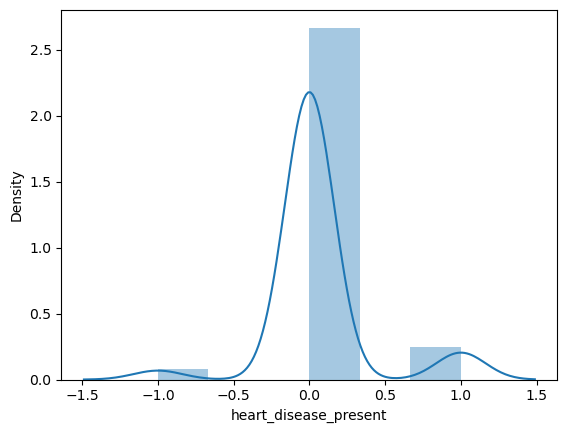

In [409]:
error = y_test - ab_pred   # assign the error value
sns.distplot(error, kde=True)   # plot the error value

* AdaBoost model occurs over fitting based on testing accuracy 0.88 and training accuracy 0.92.
* AdaBoost model not gives the generalize model. 
* AdaBoost model required the hyperparameter tuning.
* Error also not follow the normal distribution.

In [1665]:
# set the params grid for tuning
param_grid = {
    "base_estimator": [DecisionTreeClassifier(max_depth=1), DecisionTreeClassifier(max_depth=2)],
    "n_estimators": [50, 100, 200],
    "learning_rate": [0.01, 0.1, 1],
    "algorithm": ["SAMME", "SAMME.R"]
}

# Initialize the AdaBoost classifier
abc = AdaBoostClassifier()

# Grid search with cross-validation
grid_search = GridSearchCV(estimator=abc, param_grid=param_grid, cv=5, scoring='accuracy',verbose=2, refit=True)
grid_search.fit(x_train, y_train)  # fit the GridSearchCV

grid_search.best_params_

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END algorithm=SAMME, base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.01, n_estimators=50; total time=   0.1s
[CV] END algorithm=SAMME, base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.01, n_estimators=50; total time=   0.1s
[CV] END algorithm=SAMME, base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.01, n_estimators=50; total time=   0.1s
[CV] END algorithm=SAMME, base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.01, n_estimators=50; total time=   0.1s
[CV] END algorithm=SAMME, base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.01, n_estimators=50; total time=   0.1s
[CV] END algorithm=SAMME, base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.01, n_estimators=100; total time=   0.2s
[CV] END algorithm=SAMME, base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.01, n_estimators=100; total time=   0.3

{'algorithm': 'SAMME',
 'base_estimator': DecisionTreeClassifier(max_depth=1),
 'learning_rate': 0.1,
 'n_estimators': 200}

In [1666]:
y_ab =grid_search.predict(x_test)  # predict the testing data
print(accuracy_score(y_test,y_ab))  # check the model performance
print(f1_score(y_test,y_ab))  # chcek f1_score

0.9444444444444444
0.9473684210526316


In [1667]:
y_tr_ab = grid_search.predict(x_train)  ## predict the training data
accuracy_score(y_train,y_tr_ab)  # check the model performance

0.8402777777777778

* The AdaBoost model occurs under fiting after appling hyperparameter tuning.

In [410]:
# Here we try to change random_state and make a generalized model
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=113) # split the data 
# create an instance object
ab1 = AdaBoostClassifier(algorithm='SAMME',base_estimator=DecisionTreeClassifier(max_depth=1),learning_rate=0.1,n_estimators=200)
ab1.fit(x_train,y_train)  # train the model
ab_predict = ab1.predict(x_test)  # predict the testing data


In [411]:
a8 = accuracy_score(y_test,ab_predict)  # check the model performance
a8

0.8611111111111112

In [412]:
f1_8 = f1_score(y_test,ab_predict)  #check teh f1_score
f1_8

0.8275862068965517

In [413]:
y_pred_tr = ab1.predict(x_train)  # predict the testing data
accuracy_score(y_train,y_pred_tr)  # check the model performance

0.8680555555555556

**Conclusion**
* AdaBoost model gives the generalize model.
* It's testing accuracy is 0.86 and training accuracy is 0.86.

### KNN : K-Nearest Neighbors

In [414]:
from sklearn.neighbors import KNeighborsClassifier  # import KNeighborsClassifier

In [415]:
knn = KNeighborsClassifier(n_neighbors=80,leaf_size=80,weights='uniform')  # create an instance object
knn.fit(x_train,y_train)  # train the model

KNeighborsClassifier(leaf_size=80, n_neighbors=80)

In [416]:
knn_pred = knn.predict(x_test)  # predict the testing data

In [417]:
accuracy_score(y_test,knn_pred)  # check the model performance

0.6944444444444444

In [418]:
f1_score(y_test,knn_pred)  # check the f1 score

0.56

In [419]:
print(classification_report(y_test,knn_pred))  # check the classification report

              precision    recall  f1-score   support

           0       0.64      0.95      0.77        19
           1       0.88      0.41      0.56        17

    accuracy                           0.69        36
   macro avg       0.76      0.68      0.66        36
weighted avg       0.75      0.69      0.67        36



In [420]:
y_tr_knn = knn.predict(x_train)
accuracy_score(y_train,y_tr_knn)

0.7708333333333334

<Axes: xlabel='heart_disease_present', ylabel='Density'>

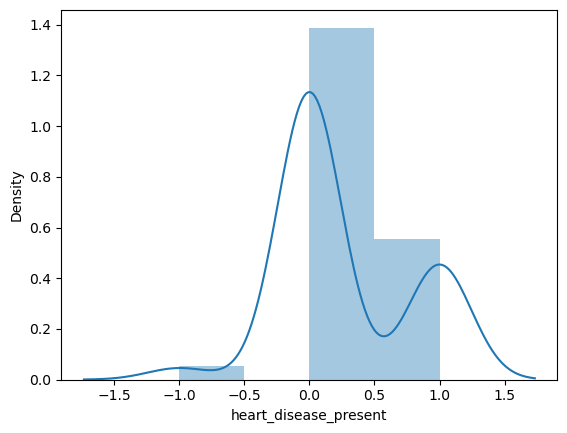

In [421]:
error = y_test - knn_pred
sns.distplot(error, kde=True)

* KNN model occurs over fitting based on testing accuracy 0.69 and training accuracy 0.77.
* KNN model not gives the generalize model. 
* KNN model required the hyperparameter tuning.
* Error also not follow the normal distribution.

In [240]:
# Define the hyperparameters and the range of values to search
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [10, 30, 50],
    'p': [1, 2]
}

knn1 = KNeighborsClassifier()  # create an instance object
# Set up the grid search
grid_search = GridSearchCV(estimator=knn1, param_grid=param_grid, refit=True, cv=5, n_jobs=-1, scoring='accuracy')

# Fit grid search
grid_search.fit(x_train, y_train)

grid_search.best_params_   # shows the best params

{'algorithm': 'auto',
 'leaf_size': 10,
 'n_neighbors': 7,
 'p': 1,
 'weights': 'distance'}

In [241]:
y_knn =grid_search.predict(x_test)  # predict the testing data
a9 = accuracy_score(y_test,y_knn)  # check the model performance
a9

0.8333333333333334

In [242]:
f1_9 = f1_score(y_test,y_knn)  # chcek f1_score
f1_9

0.8000000000000002

In [243]:
y_tr_knn = grid_search.predict(x_train)  ## predict the training data
accuracy_score(y_train,y_tr_knn)  # check the model performance

1.0

 * The KNN model occurs the over fitting based on the testing accuracy 0.83 and training accuracy 1.0.

### ANN : Artificial Neural Network

In [422]:
from sklearn.neural_network import MLPClassifier  # import MLPClassifier

In [423]:
ann = MLPClassifier(random_state=7)  # create an instance object
ann.fit(x_train,y_train)  # train the model

MLPClassifier(random_state=7)

In [424]:
ann_pred = ann.predict(x_test)  # predict the testing data

In [425]:
accuracy_score(y_test,ann_pred)   # check the  model performance

0.8333333333333334

In [426]:
f1_score(y_test,ann_pred)  # check the f1 score

0.8000000000000002

In [427]:
print(classification_report(y_test,ann_pred))  # check the classification report

              precision    recall  f1-score   support

           0       0.78      0.95      0.86        19
           1       0.92      0.71      0.80        17

    accuracy                           0.83        36
   macro avg       0.85      0.83      0.83        36
weighted avg       0.85      0.83      0.83        36



In [428]:
y_tr_ann = ann.predict(x_train)  # predict the training data
accuracy_score(y_train,y_tr_ann)  # check the model performance

0.9097222222222222

In [429]:
# here we define the for loop for train the model by different random state
accuracy=[]  # create an empty list
f1=[]  # create an empty list
for i in range(1,150):  # for loop 
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=i) # split the data
    mlp = MLPClassifier()   # create an instance object
    mlp.fit(x_train,y_train)  # train the model
    y_pred = mlp.predict(x_test)  # predict the testing data
    a = accuracy_score(y_test,y_pred)  # check the model performance
    accuracy.append(a)  # add the value 
    f = f1_score(y_test,y_pred)  # check the f1 score
    f1.append(f)  # add the value
    
high_accuracy = [max(accuracy),accuracy.index(max(accuracy))]  # assign max accuracy and index
high_f1 = [max(f1),f1.index(max(f1))]   # assign max f1 and index

print('Random_state :',high_accuracy[1],'accuracy_score :',high_accuracy[0])
print('Random_state :',high_f1[1],'f1_score :',high_f1[0])

Random_state : 113 accuracy_score : 0.9722222222222222
Random_state : 113 f1_score : 0.9743589743589743


In [430]:
y_tr = mlp.predict(x_train)  # random_state = 149
accuracy_score(y_train,y_tr)  # check the model performance

0.8888888888888888

In [431]:
accuracy[148]  # random_state = 149

0.9166666666666666

In [432]:
# here we can change the random_state and try to increase the model performance
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=149)   # split the data
mlp = MLPClassifier(random_state=0)  # create an instance object
mlp.fit(x_train,y_train)  # train the model
y_pred = mlp.predict(x_test)  # predict the testing data

In [433]:
a10 = accuracy_score(y_test,y_pred)  # check the model performance
a10

0.9166666666666666

In [434]:
f1_10 = f1_score(y_test,y_pred)  # check the f1_score
f1_10

0.896551724137931

In [435]:
y_tr_pred = mlp.predict(x_train)  # predict the training data
accuracy_score(y_train,y_tr_pred)  # check the model performance

0.9027777777777778

**Conclusion**
* ANN model gives the generalize model.
* It's testing r2_score is 0.91 and training r2_score is 0.90.

In [199]:
# set the pyperparameters
param_grid = {
    'batch_size': [16, 32, 64],
    'learning_rate_init': [0.01, 0.001,0.1],
    'hidden_layer_sizes' : [40,60,100],
    'max_iter' : [100,150],
    'activation': ['relu', 'tanh']
}

mlp1 = MLPClassifier()  # create an instance object
# initialize the GridSearchCV
grid_cv = GridSearchCV(estimator=mlp1,param_grid=param_grid,verbose=2,scoring='accuracy',n_jobs=-1,refit=True,cv=5)
grid_cv.fit(x_train,y_train)  # train the model

grid_cv.best_params_  # shows the best params

Fitting 5 folds for each of 108 candidates, totalling 540 fits


{'activation': 'relu',
 'batch_size': 32,
 'hidden_layer_sizes': 100,
 'learning_rate_init': 0.001,
 'max_iter': 100}

In [200]:
# create an instance object
mlp2 = MLPClassifier(activation='relu',batch_size=32,hidden_layer_sizes=100,learning_rate_init=0.001,max_iter=100,random_state=149)
mlp2.fit(x_train,y_train)  # train the model

MLPClassifier(batch_size=32, hidden_layer_sizes=100, max_iter=100,
              random_state=149)

In [201]:
mlp2_pred = mlp2.predict(x_test)  # predcit the testing data
print(accuracy_score(y_test,mlp2_pred))  # check the model performance
print(f1_score(y_test,mlp2_pred))  # check the f1 score

0.8888888888888888
0.8571428571428571


In [203]:
mlp2_tr = mlp2.predict(x_train)  # predict the training data
accuracy_score(y_train,mlp2_tr)  # check the model performance

0.9027777777777778

<Axes: xlabel='heart_disease_present', ylabel='Density'>

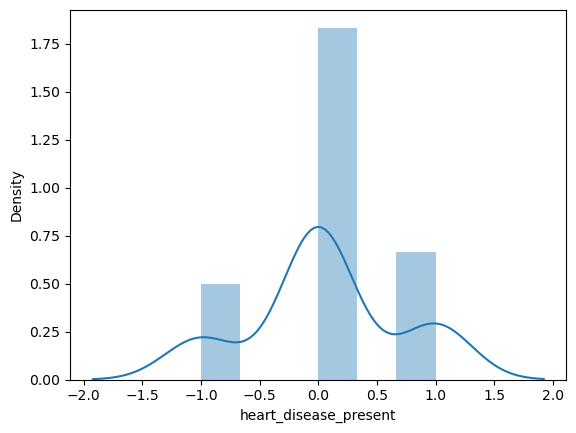

In [436]:
error = y_test - ann_pred
sns.distplot(error, kde=True)

## Model Comparision Report

In [437]:
# make a table for all algorithm's performance and error
score = pd.DataFrame({"Model":['Logistic regression','SVM','Decision Tree ALgorithm','Bagging ALgorithm',
                    'Random Forest ALgorithm','Gradient Boosting','XGB Classifier','AdaBoost ALgorithm','KNN','ANN'],
                     "accuracy_score":[a1*100,a2*100,a3*100,a4*100,a5*100,a6*100,a7*100,a8*100,a9*100,a10*100],
                     "f1_score":[f1_1,f1_2,f1_3,f1_4,f1_5,f1_6,f1_7,f1_8,f1_9,f1_10]})

In [438]:
score

,Model,accuracy_score,f1_score
0,Logistic regression,88.888889,0.857143
1,SVM,91.666667,0.880000
2,Decision Tree ALgorithm,86.111111,0.827586
3,Bagging ALgorithm,91.666667,0.914286
4,Random Forest ALgorithm,94.444444,0.941176
5,Gradient Boosting,88.888889,0.894737
6,XGB Classifier,94.444444,0.950000
7,AdaBoost ALgorithm,86.111111,0.827586
8,KNN,83.333333,0.800000
9,ANN,91.666667,0.896552


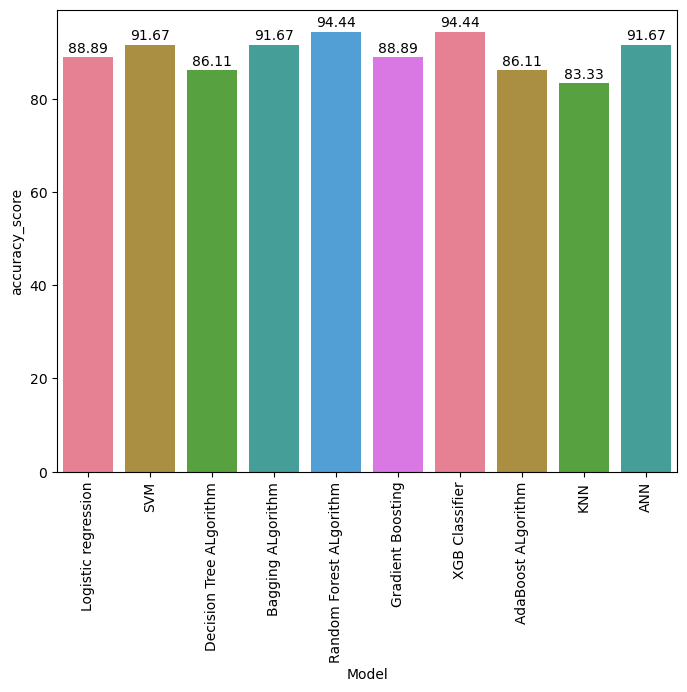

In [439]:
# use for All model performance show in barplot graph
palette = sns.color_palette("husl") # define the color for barplot 
plt.figure(figsize=(8, 6)) # define the plot size
plt.xticks(rotation = 90) # rotation x ticks
a = sns.barplot(x=score.Model, y=score.accuracy_score, data=score, palette=palette) # create the barplot

for index, value in enumerate(score['accuracy_score']): # show indivisual bar values show
    a.text(index, value + 1, f'{value:.2f}', ha='center')

### **Final Conclusion**:-

* I have used 10 Algorithms like Logistic Regression, SVM, Decision Tree, Bagging Algorithm, Random Forest, Gradient Boosting, XGB Regressor, AdaBoost Regressor, KNN and ANN.
* There are many algorithms gives generalized model like logistic Regression, SVM, DecisionTree, RandomForest Algorithm, AdaBoost Algorithm and ANN.
* The Bagging Algorithm, Gradient Boosting, XGBClassifier and KNN Algorithms occurs over fiting.
* Best Algorithm is RandomForest, which is generalized model and gives highest accuracy 94.44 and highest f1_score 94.11.
* Most of algorithm provides the model performance greater than 0.85.

## Report on Challenges Faced

* The analysis of the Heart Diseased dataset reveals that it contains 180 entries and 15 columns, with 14 input features and 1 target variable.
* Among the columns, there are 1 float data types , 12 int data types and 2 object type.
* The dataset presents challenges due to the presence of multiple outliers across various columns and does not exhibit a normal distribution for all features.
* Additionally, the feature selection process identified less relationships among independent and dependent columns, leading to the decision to drop some of them.
*  Overall, these insights highlight the importance of careful data preprocessing and model optimization and hyperparameter tuning in improving predictive performance.|
*  All model needs hyperparameter tuning for improving model performance.

### Save the Model

In [440]:
import pickle  #used for save the model

In [441]:
with open('Heart_Diseased.pkl','wb') as f : # save the file name
    pickle.dump(rf1,f) #dump the bg model 

In [442]:
with open('Heart_Diseased.pkl','rb') as f : # call the file
    model = pickle.load(f)  # load the file

In [443]:
x.head()  # shows the first 5 rows

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,1,1,0.447368,2,0,0,2,0.777778,0.000000,1,0.333333,0.698113,0
1,2,1,0.210526,3,0,0,0,0.376068,0.421053,0,0.520833,0.584906,0
2,1,1,0.407895,4,3,0,2,0.760684,0.000000,1,1.000000,0.622642,1
3,1,2,0.763158,4,0,0,0,0.414530,0.000000,1,0.229167,0.801887,0
4,3,2,0.473684,1,0,0,2,0.615385,0.210526,1,0.625000,0.462264,0


In [444]:
y.head()  # shows the first 5 rows

0    0
1    0
2    1
3    1
4    0
Name: heart_disease_present, dtype: int64

In [445]:
# predict the data
prediction = model.predict([[1,1,0.447368,2,0,0,2,0.777778,0.000000,1,0.333333,0.698113,0]])
prediction

array([0], dtype=int64)